In [6]:
import warnings
warnings.filterwarnings('ignore')


In [7]:
from matplotlib import pyplot as plt
#新增加的两行
import matplotlib
matplotlib.rc("font",family='YouYuan')

In [17]:
# 在最开始部分添加这段代码
def setup_chinese_fonts_in_macos():
    """设置macOS中matplotlib的中文字体支持"""
    import os
    import matplotlib.pyplot as plt
    from matplotlib.font_manager import FontProperties
    
    # 直接使用常用的macOS中文字体
    plt.rcParams['font.family'] = ['sans-serif']  # 基本字体类型
    plt.rcParams['axes.unicode_minus'] = False    # 正确显示负号
    
    # 检查常见字体文件
    font_paths = [
        '/Library/Fonts/Arial Unicode.ttf',
        '/System/Library/Fonts/PingFang.ttc', 
        '/System/Library/Fonts/STHeiti Light.ttc',
        '/System/Library/Fonts/STHeiti Medium.ttc',
        os.path.expanduser('~/Library/Fonts/SourceHanSansSC-Regular.otf')
    ]
    
    # 查找第一个可用的字体
    for font_path in font_paths:
        if os.path.exists(font_path):
            print(f"找到中文字体: {font_path}")
            return FontProperties(fname=font_path)
    
    # 如果找不到字体文件，尝试下载思源黑体
    try:
        import urllib.request
        import tempfile
        
        # 设置下载路径
        font_url = "https://github.com/adobe-fonts/source-han-sans/raw/release/OTF/SimplifiedChinese/SourceHanSansSC-Regular.otf"
        font_dir = os.path.expanduser("~/Library/Fonts/")
        os.makedirs(font_dir, exist_ok=True)
        
        font_path = os.path.join(font_dir, "SourceHanSansSC-Regular.otf")
        
        # 如果文件不存在，下载它
        if not os.path.exists(font_path):
            print("下载思源黑体中...")
            urllib.request.urlretrieve(font_url, font_path)
            print(f"思源黑体下载成功: {font_path}")
        else:
            print(f"使用已存在的思源黑体: {font_path}")
        
        return FontProperties(fname=font_path)
    except Exception as e:
        print(f"下载字体失败: {e}")
        print("无法设置中文字体，图表可能无法正确显示中文")
        return None

# 设置全局中文字体对象
chinese_font = setup_chinese_fonts_in_macos()

# 示例：如何在图表中使用中文字体
def chinese_font_example():
    """展示如何正确使用中文字体"""
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(8, 6))
    
    # 使用中文字体的正确方式 - 所有文本元素都需要指定
    if chinese_font:
        plt.title('中文显示示例', fontproperties=chinese_font, fontsize=16)
        plt.xlabel('横轴标签', fontproperties=chinese_font, fontsize=14)
        plt.ylabel('纵轴标签', fontproperties=chinese_font, fontsize=14)
        plt.text(0.5, 0.5, '文本示例', fontproperties=chinese_font, 
               ha='center', va='center', fontsize=20)
    else:
        # 如果没有找到中文字体，至少尝试显示
        plt.title('中文显示示例', fontsize=16)
        plt.xlabel('横轴标签', fontsize=14)
        plt.ylabel('纵轴标签', fontsize=14)
        plt.text(0.5, 0.5, '文本示例', ha='center', va='center', fontsize=20)
    
    plt.savefig('chinese_font_example.png', dpi=120)
    print("示例图片已保存: chinese_font_example.png")
    plt.close()

# 运行示例
chinese_font_example()

找到中文字体: /Library/Fonts/Arial Unicode.ttf
示例图片已保存: chinese_font_example.png


使用字体: /Library/Fonts/Arial Unicode.ttf
已保存图表: demographics_analysis.png


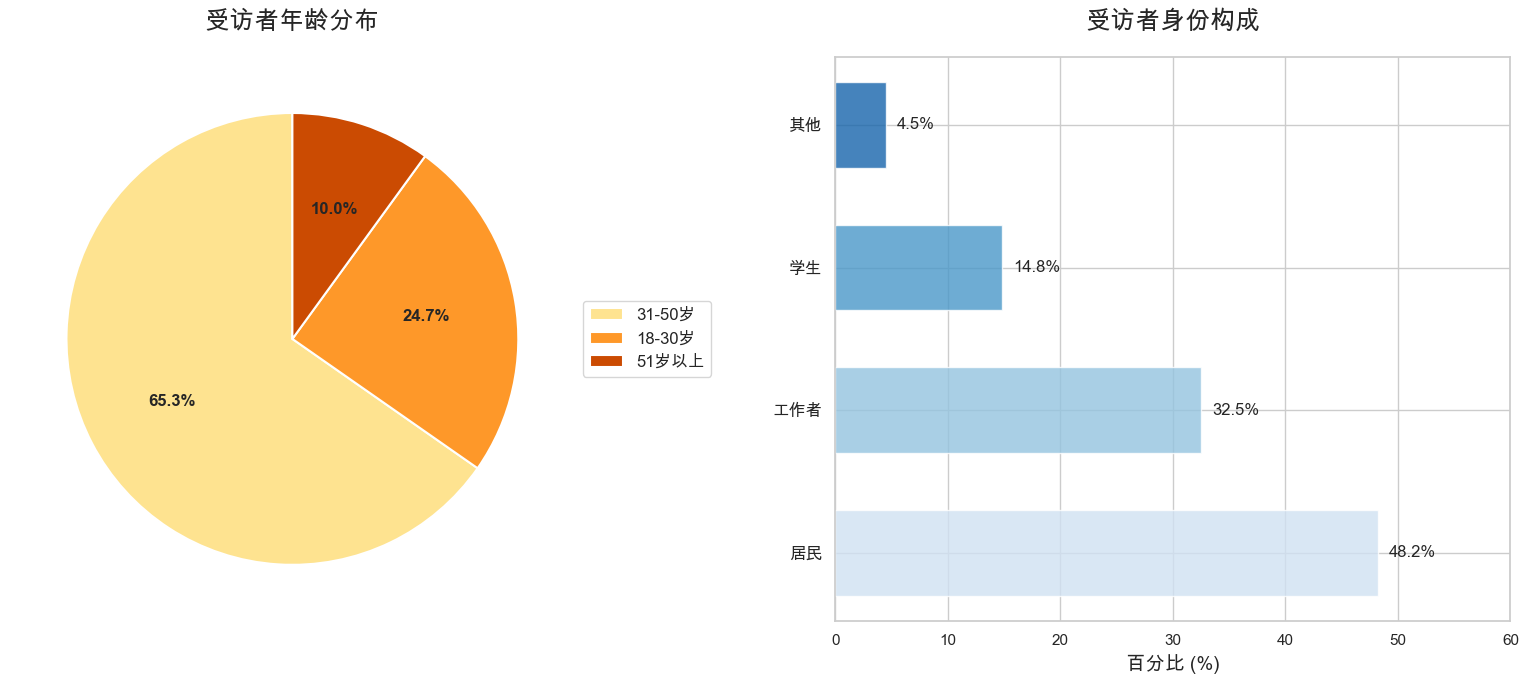

In [22]:
def plot_demographics():
    # 设置中文字体
    import os
    from matplotlib.font_manager import FontProperties
    
    # 查找可用的中文字体
    font_candidates = [
        '/Library/Fonts/Arial Unicode.ttf',      # Arial Unicode MS
        '/System/Library/Fonts/PingFang.ttc',    # 苹方
        '/System/Library/Fonts/STHeiti Light.ttc',  # 华文细黑
        os.path.expanduser('~/Library/Fonts/SourceHanSansSC-Regular.otf')  # 思源黑体
    ]
    
    chinese_font = None
    for font_path in font_candidates:
        if os.path.exists(font_path):
            chinese_font = FontProperties(fname=font_path)
            print(f"使用字体: {font_path}")
            break
    
    # 创建图表
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # 年龄分布饼图 - 使用中文字体
    # 不直接在pie函数中设置labels，而是手动添加
    wedges, texts, autotexts = ax1.pie(
        age_df['比例'], 
        labels=None,  # 先不设置标签
        autopct='%1.1f%%', 
        startangle=90, 
        shadow=False, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
        colors=sns.color_palette("YlOrBr", 3)
    )
    
    # 手动添加带中文字体的标签
    if chinese_font:
        # 设置标题
        ax1.set_title('受访者年龄分布', fontproperties=chinese_font, fontsize=18, pad=20)
        
        # 添加图例代替标签
        ax1.legend(
            wedges, 
            age_df['年龄段'],
            loc='center left',
            bbox_to_anchor=(1, 0.5),
            prop=chinese_font
        )
    else:
        ax1.set_title('受访者年龄分布', fontsize=18, pad=20)
        ax1.legend(
            wedges, 
            age_df['年龄段'],
            loc='center left',
            bbox_to_anchor=(1, 0.5)
        )
    
    # 设置百分比文本样式
    for autotext in autotexts:
        autotext.set_fontsize(12)
        autotext.set_fontweight('bold')
    
    # 身份构成堆叠条形图
    identity_colors = sns.color_palette("Blues", len(identity_df))
    
    # 创建水平条形图
    bars = ax2.barh(np.arange(len(identity_df)), identity_df['比例'], 
                   color=identity_colors, alpha=0.8, height=0.6)
    
    # 添加数值标签
    for bar in bars:
        width = bar.get_width()
        ax2.text(width + 1, bar.get_y() + bar.get_height()/2, 
                f'{width:.1f}%', ha='left', va='center', fontsize=12)
    
    # 设置y轴标签和范围，使用中文字体
    ax2.set_yticks(np.arange(len(identity_df)))
    
    if chinese_font:
        # 使用中文字体设置标签
        ax2.set_yticklabels(identity_df['身份'], fontproperties=chinese_font, fontsize=12)
        ax2.set_xlabel('百分比 (%)', fontproperties=chinese_font, fontsize=14)
        ax2.set_title('受访者身份构成', fontproperties=chinese_font, fontsize=18, pad=20)
    else:
        ax2.set_yticklabels(identity_df['身份'], fontsize=12)
        ax2.set_xlabel('百分比 (%)', fontsize=14)
        ax2.set_title('受访者身份构成', fontsize=18, pad=20)
    
    ax2.set_xlim(0, 60)
    
    plt.tight_layout()
    plt.savefig('demographics_analysis.png', dpi=300, bbox_inches='tight')
    print("已保存图表: demographics_analysis.png")
    plt.show()
plot_demographics()

受访者年龄与身份构成数据分析
该图表展示了调查受访者的两个主要人口统计特征：年龄分布和身份构成。
受访者年龄分布分析
左侧饼图显示了三个年龄段的分布比例：
31-50岁：占比65.3%，是受访群体中的主体人群，占据了近三分之二
18-30岁：占比24.7%，是第二大年龄群体
51岁以上：占比10.0%，是最小的年龄群体
年龄分布呈现明显的集中趋势，中年群体（31-50岁）在调查中占据主导地位，而老年群体（51岁以上）的参与度相对较低。
受访者身份构成分析
右侧条形图展示了受访者的身份类别及其比例：
居民：占比48.2%，是最主要的受访群体
工作者：占比32.5%，是第二大群体
学生：占比14.8%
其他：占比4.5%，是最小的群体
身份构成数据显示，近半数的受访者是当地居民，而工作者和居民合计占比超过80%，表明调查主要覆盖了在该区域生活和工作的人群。
综合分析
中年居民主导：31-50岁年龄段（65.3%）与居民身份（48.2%）同为最大群体，表明调查结果主要反映了中年居民的观点和看法
工作人群覆盖充分：工作者占比32.5%，与年龄分布中的主要劳动力年龄段（31-50岁）高度重合，确保了对职场人群意见的有效采集
青年群体代表性：18-30岁群体占比24.7%，学生群体占比14.8%，说明年轻群体的声音在调查中得到一定程度的体现，但比例相对较低
老年群体参与度不足：51岁以上人群仅占10.0%，这可能导致老年人对城市规划和环境的特殊需求在调查结果中体现不足
样本结构的代表性：居民和工作者合计占比超过80%，这反映了调查主要针对与该区域日常生活密切相关的群体，有助于获取更贴合实际使用体验的反馈
综上所述，此次调查的人口统计特征呈现出以中年居民为主，工作人群为辅，青年群体有一定参与，而老年群体参与较少的结构特点。这种样本结构既能反映主要城市使用者的意见，但在解读结果时也应注意可能存在的年龄偏差，特别是对老年人需求的考量可能不足。

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

# 设置中文字体支持

# 设置可视化风格
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-pastel')

# 自定义配色方案
colors = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC948", "#B07AA1", "#FF9DA7"]
custom_palette = sns.color_palette(colors)
sns.set_palette(custom_palette)

# 创建数据
# 年龄分布数据
age_data = {
    '年龄段': ['31-50岁', '18-30岁', '51岁以上'],
    '比例': [65.3, 24.7, 10.0]
}
age_df = pd.DataFrame(age_data)

# 身份构成数据
identity_data = {
    '身份': ['居民', '工作者', '学生', '其他'],
    '比例': [48.2, 32.5, 14.8, 4.5]
}
identity_df = pd.DataFrame(identity_data)

# 城市风貌整体印象
impression_data = {
    '印象': ['具有独特城市风貌', '与其他城市雷同', '缺乏明确特色', '说不清'],
    '比例': [76.8, 12.5, 7.2, 3.5]
}
impression_df = pd.DataFrame(impression_data)

# 风貌特色要素数据
feature_data = {
    '特色要素': [
        '近代建筑', '滨海自然景观', '近代工业遗产', 
        '现代都市地标', '市井生活气息', '多元文化融合', '其他'
    ],
    '百分比': [73.5, 52.1, 40.6, 34.5, 32.4, 29.8, 5.7]
}
feature_df = pd.DataFrame(feature_data)

# 风貌破坏行为数据
damage_data = {
    '破坏行为': [
        '历史建筑与现代风格冲突', '步行空间破损', '违规广告覆盖', 
        '现代材料滥用', '机动车占道停放', '私搭乱建', '绿化景观缺失', '其他'
    ],
    '百分比': [68.7, 57.3, 48.0, 45.8, 44.5, 40.9, 35.4, 7.1]
}
damage_df = pd.DataFrame(damage_data)

# 满意度评价数据
satisfaction_data = {
    '评价项目': [
        '行道树覆盖率与养护状况', '垂直绿化美观性', '路灯照明覆盖度与美观性',
        '沿街立面形式', '公共空间活力', '休憩座椅数量与分布合理性',
        '垃圾桶数量与清洁度', '机动车交通秩序', '立面违规广告覆盖情况',
        '摊贩占道影响', '建筑立面色彩协调性', '步行道宽度与舒适性',
        '步行道铺装防滑性及无障碍设计'
    ],
    '平均分': [4.44, 3.65, 3.53, 2.16, 2.17, 2.15, 2.13, 2.13, 2.11, 2.10, 1.44, 1.38, 1.35],
    '维度分类': [
        '绿地系统', '绿地系统', '街道设施',
        '沿街建筑立面', '步行道与公共空间', '街道设施',
        '街道设施', '交通组织', '沿街建筑立面',
        '步行道与公共空间', '沿街建筑立面', '交通组织',
        '步行道与公共空间'
    ]
}
satisfaction_df = pd.DataFrame(satisfaction_data)

# 需求优先级数据
priority_data = {
    '需求项': [
        '修复步行通道并优化铺装', '增设街道家具', '再设计沿街广告',
        '增加遮阳避雨设施', '修复破损建筑立面', '规范摊贩管理，减少占道经营',
        '增设人车分流设施', '提升垂直绿化覆盖率', '引入咖啡馆、文创店等业态'
    ],
    '平均分': [4.70, 4.63, 4.60, 4.08, 4.06, 4.04, 2.64, 2.63, 2.58],
    '高度重视比例': [82.7, 77.5, 77.8, 35.4, 36.7, 31.7, 4.2, 4.3, 3.9]
}
priority_df = pd.DataFrame(priority_data)

# 区域需求差异数据
region_priority_data = {
    '需求项': ['修复步行通道并优化铺装', '增设街道家具', '再设计沿街广告', '规范摊贩管理'],
    '市中心区': [4.76, 4.72, 4.68, 4.23],
    '近郊区': [4.68, 4.65, 4.57, 3.96],
    '旅游热点区': [4.82, 4.78, 4.75, 4.32],
    '老工业区': [4.53, 4.48, 4.42, 3.85]
}
region_priority_df = pd.DataFrame(region_priority_data)

# 公众参与意愿数据
participation_data = {
    '态度': ['非常愿意', '愿意', '中立', '不愿意', '非常不愿意'],
    '比例': [14.8, 36.5, 31.2, 12.7, 4.8]
}
participation_df = pd.DataFrame(participation_data)

# 历史与现代平衡态度数据
balance_data = {
    '设计理念': ['传统符号与现代元素融合', '以现代风格为主导', '完全保留过去环境', '其他'],
    '比例': [45.2, 32.1, 15.5, 7.2]
}
balance_df = pd.DataFrame(balance_data)

# 文化设施期望数据
facility_data = {
    '设施类型': ['小微展览空间', '口袋公园与街角花园', '24小时社区书房', '露天文化剧场', '其他'],
    '比例': [43.8, 40.4, 29.8, 23.7, 7.9]
}
facility_df = pd.DataFrame(facility_data)

def plot_demographics():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
    
    # 年龄分布饼图
    ax1.pie(age_df['比例'], labels=age_df['年龄段'], autopct='%1.1f%%', 
            startangle=90, shadow=False, 
            wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
            textprops={'fontsize': 12, 'fontweight': 'bold'},
            colors=sns.color_palette("YlOrBr", 3))
    ax1.set_title('受访者年龄分布', fontsize=18, pad=20)
    
    # 身份构成堆叠条形图
    identity_colors = sns.color_palette("Blues", len(identity_df))
    
    # 创建水平条形图
    bars = ax2.barh(np.arange(len(identity_df)), identity_df['比例'], 
                   color=identity_colors, alpha=0.8, height=0.6)
    
    # 添加数值标签
    for bar in bars:
        width = bar.get_width()
        ax2.text(width + 1, bar.get_y() + bar.get_height()/2, 
                f'{width:.1f}%', ha='left', va='center', fontsize=12)
    
    # 设置y轴标签和范围
    ax2.set_yticks(np.arange(len(identity_df)))
    ax2.set_yticklabels(identity_df['身份'], fontsize=12)
    ax2.set_xlim(0, 60)
    ax2.set_xlabel('百分比 (%)', fontsize=14)
    ax2.set_title('受访者身份构成', fontsize=18, pad=20)
    
    plt.tight_layout()
    plt.savefig('demographics_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_demographics()

使用字体: /Library/Fonts/Arial Unicode.ttf
已保存图表: city_landscape_perception.png


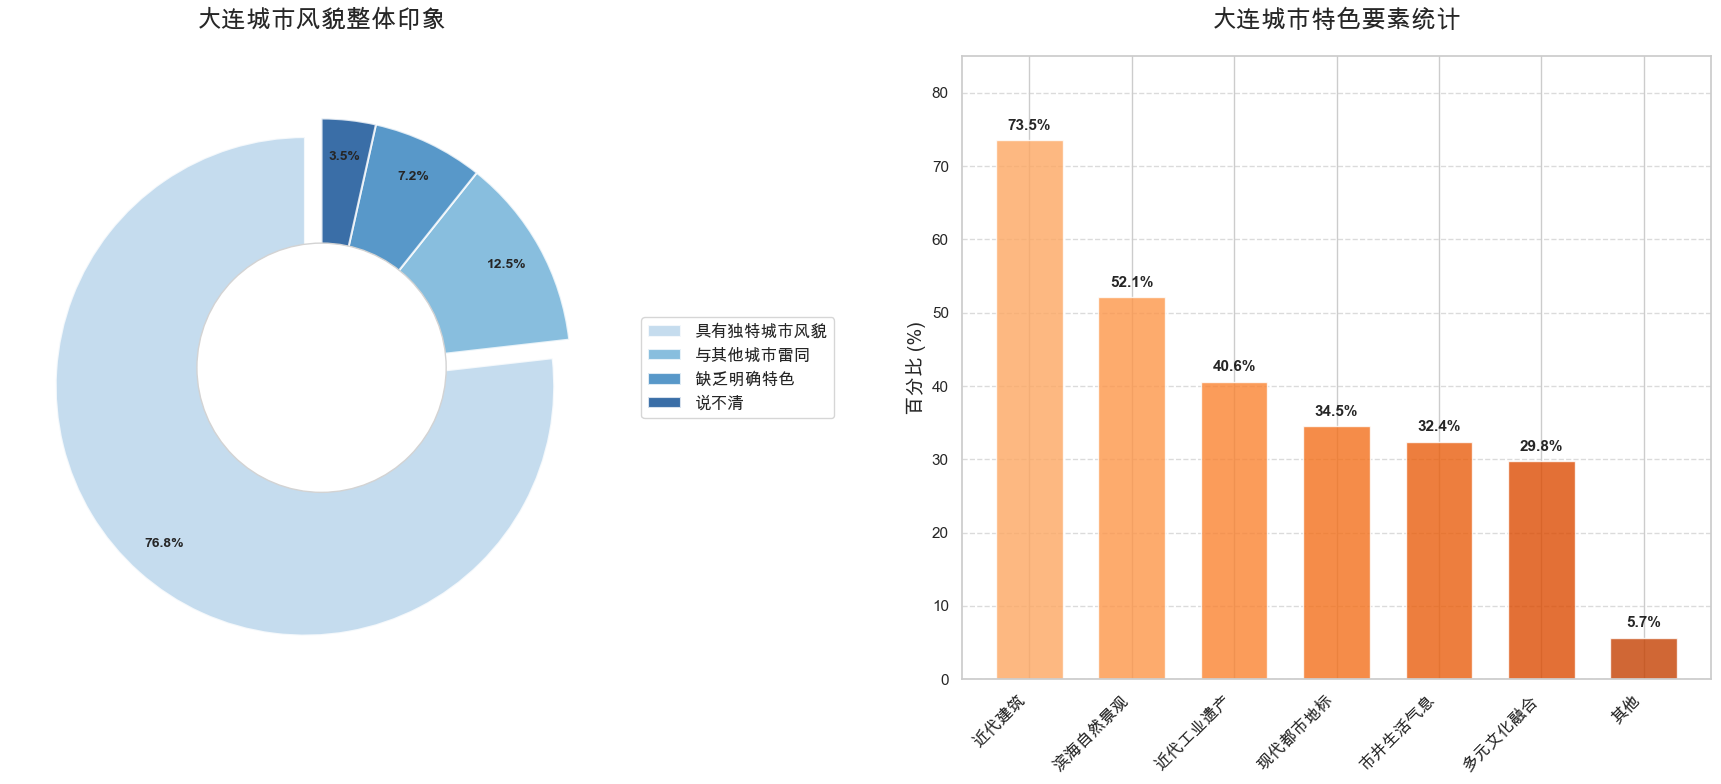

In [25]:
def plot_city_landscape_perception():
    # 设置中文字体
    import os
    from matplotlib.font_manager import FontProperties
    
    # 查找可用的中文字体
    font_candidates = [
        '/Library/Fonts/Arial Unicode.ttf',      # Arial Unicode MS
        '/System/Library/Fonts/PingFang.ttc',    # 苹方
        '/System/Library/Fonts/STHeiti Light.ttc',  # 华文细黑
        '/System/Library/Fonts/STHeiti Medium.ttc',  # 华文中黑
        os.path.expanduser('~/Library/Fonts/SourceHanSansSC-Regular.otf')  # 思源黑体
    ]
    
    chinese_font = None
    for font_path in font_candidates:
        if os.path.exists(font_path):
            chinese_font = FontProperties(fname=font_path)
            print(f"使用字体: {font_path}")
            break
    
    if not chinese_font:
        print("警告：未找到可用的中文字体文件")
    
    # 创建图表
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # 整体印象饼图
    # 使用渐变色
    cmap = plt.cm.Blues
    colors = cmap(np.linspace(0.3, 0.9, len(impression_df)))
    
    explode = (0.1, 0, 0, 0)  # 使主要部分突出
    
    # 不直接在pie函数中设置labels，稍后用图例替代
    patches, texts, autotexts = ax1.pie(impression_df['比例'], 
                            labels=None,  # 不直接设置标签
                            autopct='%1.1f%%',
                            startangle=90, 
                            pctdistance=0.85,
                            wedgeprops={'edgecolor': 'white', 'linewidth': 1.5, 'alpha': 0.8},
                            explode=explode,
                            colors=colors)
    
    # 添加带中文字体的图例
    if chinese_font:
        ax1.legend(patches, impression_df['印象'], 
                  loc='center left', 
                  bbox_to_anchor=(1, 0.5),
                  prop=chinese_font)
    else:
        ax1.legend(patches, impression_df['印象'], 
                  loc='center left', 
                  bbox_to_anchor=(1, 0.5))
    
    # 设置饼图中的文本样式
    for autotext in autotexts:
        autotext.set_fontsize(10)
        autotext.set_fontweight('bold')
    
    # 添加圆环
    centre_circle = plt.Circle((0, 0), 0.5, fc='white', edgecolor='lightgray')
    ax1.add_artist(centre_circle)
    
    # 设置标题，使用中文字体
    if chinese_font:
        ax1.set_title('大连城市风貌整体印象', fontproperties=chinese_font, fontsize=18, pad=20)
    else:
        ax1.set_title('大连城市风貌整体印象', fontsize=18, pad=20)
    
    # 城市特色要素图形
    feature_df_sorted = feature_df.sort_values('百分比', ascending=False)
    
    # 使用渐变色填充条形
    colors = plt.cm.Oranges(np.linspace(0.4, 0.8, len(feature_df_sorted)))
    
    bars = ax2.bar(range(len(feature_df_sorted)), feature_df_sorted['百分比'], 
                  color=colors, alpha=0.8, width=0.65)
    
    # 添加数据标签
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # 设置x轴刻度和标签，使用中文字体
    ax2.set_xticks(range(len(feature_df_sorted)))
    if chinese_font:
        ax2.set_xticklabels(feature_df_sorted['特色要素'], rotation=45, ha='right', 
                           fontsize=11, fontproperties=chinese_font)
        ax2.set_ylabel('百分比 (%)', fontproperties=chinese_font, fontsize=14)
        ax2.set_title('大连城市特色要素统计', fontproperties=chinese_font, fontsize=18, pad=20)
    else:
        ax2.set_xticklabels(feature_df_sorted['特色要素'], rotation=45, ha='right', fontsize=11)
        ax2.set_ylabel('百分比 (%)', fontsize=14)
        ax2.set_title('大连城市特色要素统计', fontsize=18, pad=20)
    
    ax2.set_ylim(0, 85)  # 设置Y轴范围以容纳标签
    
    # 添加网格线
    ax2.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.savefig('city_landscape_perception.png', dpi=300, bbox_inches='tight')
    print("已保存图表: city_landscape_perception.png")
    plt.show()
plot_city_landscape_perception()

左侧饼图展示的数据清晰显示了受访者对大连城市风貌的评价分布：
76.8% 的受访者认为大连"具有独特城市风貌"
12.5% 的受访者认为大连"与其他城市雷同"
7.2% 的受访者认为大连"缺乏明确特色"
3.5% 的受访者表示"说不清"
超过3/4的受访者认同大连具有独特风貌，这一比例远高于持其他观点的人群，表明大连在市民心中拥有较为突出的城市特色。持否定或中性意见的受访者总计仅占23.2%。
城市特色要素统计
右侧条形图呈现了构成大连特色的七类要素及其占比：
近代建筑: 73.5%
滨海自然景观: 52.1%
近代工业遗产: 40.6%
现代都市地标: 34.5%
市井生活气息: 32.4%
多元文化融合: 29.8%
其他: 5.7%
数据显示了明显的梯度分布，首位的近代建筑占比超过73%，而最低的"其他"选项仅为5.7%。前两项要素（近代建筑和滨海自然景观）获得了超过半数受访者的认同，显示这两项是大连城市特色的核心构成。
数据趋势分析
主导要素突出：近代建筑以73.5%的高比例成为大连最具辨识度的城市特色，领先第二位的滨海自然景观21.4个百分点
自然与人工环境结合：物质环境要素（建筑、景观、地标）普遍获得较高认同度，其中自然景观（52.1%）与人工建筑（73.5%）共同构成城市特色的主要方面
历史与现代并存：近代建筑（73.5%）和近代工业遗产（40.6%）的高认同度与现代都市地标（34.5%）形成互补，反映城市特色中历史与现代元素并存的特点
非物质要素认同度较低：相比物质环境要素，市井生活气息（32.4%）和多元文化融合（29.8%）等非物质文化要素获得的认同度相对较低
特色要素集中度高：前六项特色要素的认同度均超过29%，而"其他"选项仅占5.7%，表明调查已较全面地覆盖了大连的主要城市特色要素
综上所述，数据显示大连已形成以近代建筑和滨海景观为核心的独特城市风貌，这种特色获得了大多数市民的认同。物质环境要素在城市特色塑造中发挥着更为重要的作用，而历史遗产元素比现代元素更受认可。

使用字体: /Library/Fonts/Arial Unicode.ttf
已保存图表: landscape_damage_analysis.png


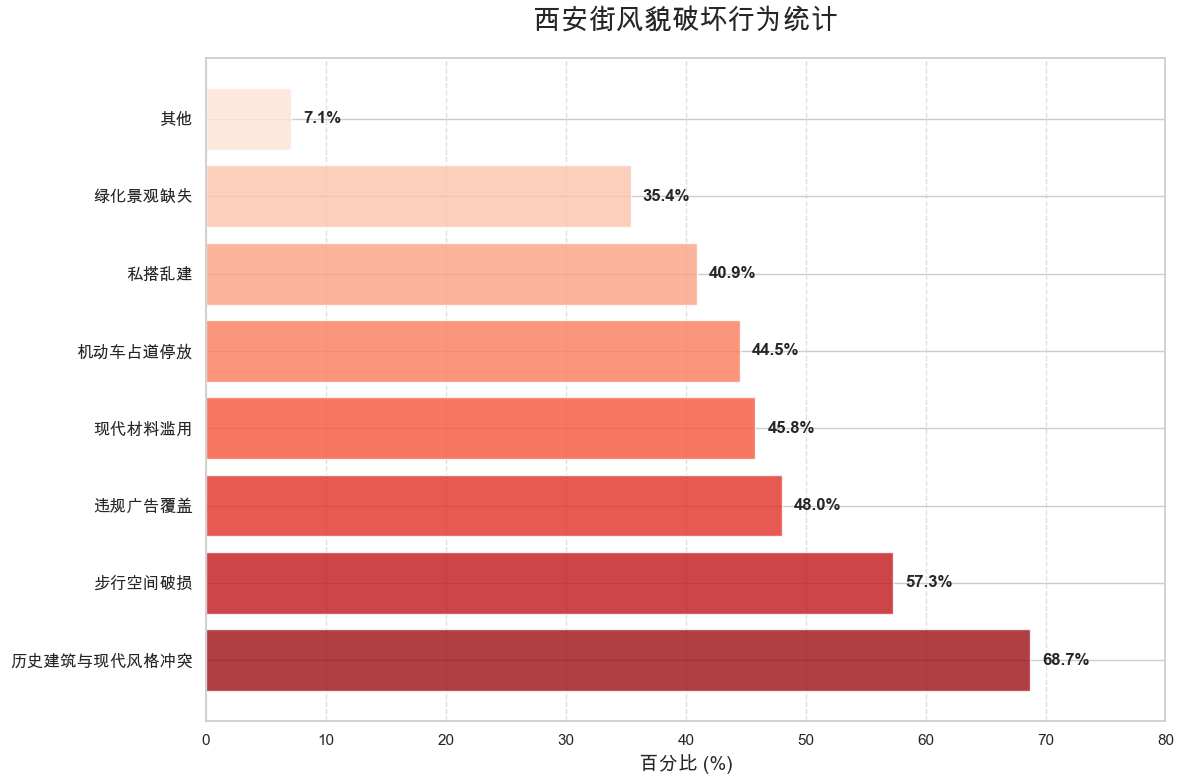

In [28]:
def plot_landscape_damage():
    # 设置中文字体
    import os
    from matplotlib.font_manager import FontProperties
    
    # 查找可用的中文字体
    font_candidates = [
        '/Library/Fonts/Arial Unicode.ttf',      # Arial Unicode MS
        '/System/Library/Fonts/PingFang.ttc',    # 苹方
        '/System/Library/Fonts/STHeiti Light.ttc',  # 华文细黑
        '/System/Library/Fonts/STHeiti Medium.ttc',  # 华文中黑
        os.path.expanduser('~/Library/Fonts/SourceHanSansSC-Regular.otf')  # 思源黑体
    ]
    
    chinese_font = None
    for font_path in font_candidates:
        if os.path.exists(font_path):
            chinese_font = FontProperties(fname=font_path)
            print(f"使用字体: {font_path}")
            break
    
    if not chinese_font:
        print("警告：未找到可用的中文字体文件")
    
    plt.figure(figsize=(12, 8))
    
    # 排序数据
    damage_df_sorted = damage_df.sort_values('百分比', ascending=False)
    
    # 创建水平条形图，用数字索引替代中文标签
    y_pos = range(len(damage_df_sorted))
    bars = plt.barh(y_pos, damage_df_sorted['百分比'], 
                  color=sns.color_palette("Reds_r", len(damage_df_sorted)), alpha=0.8)
    
    # 添加数据标签
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 1, bar.get_y() + bar.get_height()/2, 
                f'{width:.1f}%', ha='left', va='center', fontsize=12, fontweight='bold')
    
    # 设置Y轴刻度和标签，使用中文字体
    plt.yticks(y_pos)
    if chinese_font:
        plt.gca().set_yticklabels(damage_df_sorted['破坏行为'], fontproperties=chinese_font, fontsize=12)
        plt.title('西安街风貌破坏行为统计', fontproperties=chinese_font, fontsize=20, pad=20)
        plt.xlabel('百分比 (%)', fontproperties=chinese_font, fontsize=14)
    else:
        plt.gca().set_yticklabels(damage_df_sorted['破坏行为'], fontsize=12)
        plt.title('西安街风貌破坏行为统计', fontsize=20, pad=20)
        plt.xlabel('百分比 (%)', fontsize=14)
    
    plt.xlim(0, 80)  # 设置X轴范围
    
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.savefig('landscape_damage_analysis.png', dpi=300, bbox_inches='tight')
    print("已保存图表: landscape_damage_analysis.png")
    plt.show()
plot_landscape_damage()

从数据可以归纳出几类主要破坏西安街风貌的问题：
风格冲突问题：历史建筑与现代风格冲突（68.7%）和现代材料滥用（45.8%）都属于破坏历史街区原有风貌的风格不协调问题，这类问题最为突出，表明西安作为历史文化名城面临的最主要挑战是如何处理历史保护与现代发展的关系
公共空间问题：步行空间破损（57.3%）和机动车占道停放（44.5%）反映了公共空间使用和管理的混乱，严重影响了街道的整体形象和功能性
违规建设问题：私搭乱建（40.9%）和违规广告覆盖（48.0%）属于人为增设的不当构筑物，表明城市管理执法力度可能不足
生态环境问题：绿化景观缺失（35.4%）虽然比例相对较低，但也表明西安街区的生态环境建设有待加强
问题严重程度分析
高度关注问题（>60%）：历史建筑与现代风格冲突（68.7%）是最突出的问题，超过三分之二的比例表明这是西安街道风貌保护中最紧迫需要解决的矛盾
严重问题（40-60%）：步行空间破损（57.3%）、违规广告覆盖（48.0%）、现代材料滥用（45.8%）、机动车占道停放（44.5%）和私搭乱建（40.9%）均属于严重破坏街道风貌的行为，需要系统性整治
中度问题（20-40%）：绿化景观缺失（35.4%）影响相对较小，但仍需在城市更新中予以重视
其他问题（<10%）：比例较低，可能是一些零散或特殊情况
综合结论
西安街道风貌破坏主要集中在历史与现代的不协调、公共空间管理失序以及违规建设三大方面
最严重的问题是历史建筑与现代风格的冲突，表明西安在城市更新过程中对历史文化保护的重视程度不足
各类破坏行为的比例普遍较高（除"其他"外均超过35%），说明西安街道风貌破坏是一个多方面、系统性的问题，需要综合治理
步行空间破损问题突出（57.3%），反映基础设施维护不足，直接影响市民日常使用体验和城市形象
数据反映了城市管理执法、历史保护意识、公共空间规划等多个方面存在不足，亟需系统性改进策略

使用字体: /Library/Fonts/Arial Unicode.ttf
已保存图表: satisfaction_ratings.png


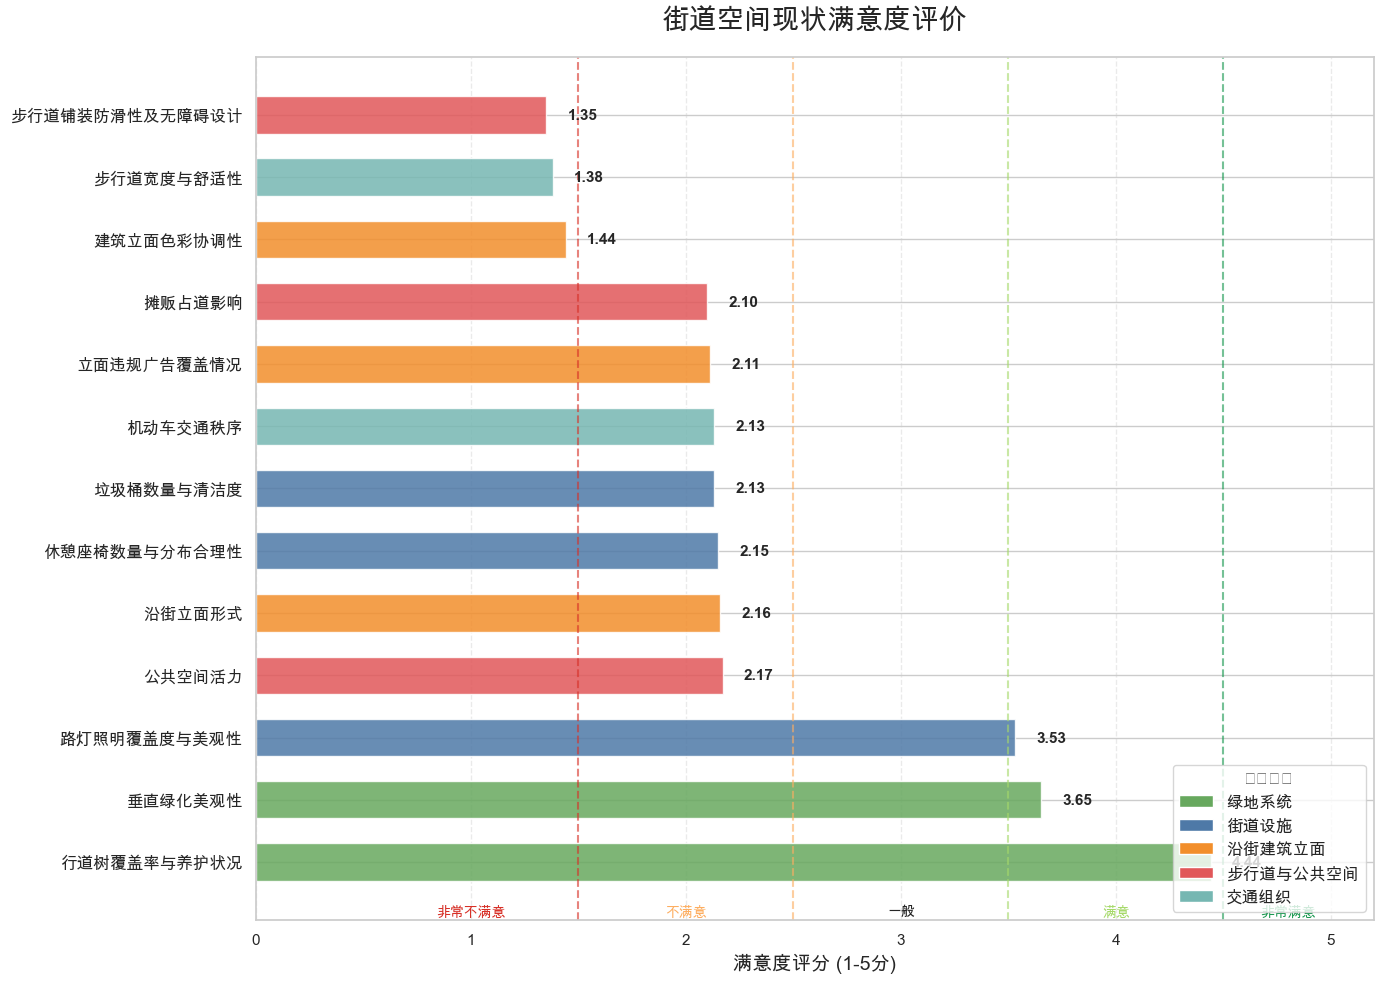

In [32]:
def plot_satisfaction_ratings():
    # 设置中文字体
    import os
    from matplotlib.font_manager import FontProperties
    
    # 查找可用的中文字体
    font_candidates = [
        '/Library/Fonts/Arial Unicode.ttf',      # Arial Unicode MS
        '/System/Library/Fonts/PingFang.ttc',    # 苹方
        '/System/Library/Fonts/STHeiti Light.ttc',  # 华文细黑
        '/System/Library/Fonts/STHeiti Medium.ttc',  # 华文中黑
        os.path.expanduser('~/Library/Fonts/SourceHanSansSC-Regular.otf')  # 思源黑体
    ]
    
    chinese_font = None
    for font_path in font_candidates:
        if os.path.exists(font_path):
            chinese_font = FontProperties(fname=font_path)
            print(f"使用字体: {font_path}")
            break
    
    if not chinese_font:
        print("警告：未找到可用的中文字体文件")
    
    # 按平均分排序
    satisfaction_df_sorted = satisfaction_df.sort_values('平均分', ascending=False)
    
    # 创建图形
    plt.figure(figsize=(14, 10))
    
    # 创建自定义颜色映射
    norm = plt.Normalize(satisfaction_df_sorted['平均分'].min(), satisfaction_df_sorted['平均分'].max())
    
    # 基于维度分类给不同颜色
    dimension_colors = {
        '绿地系统': '#67A85E',
        '街道设施': '#4E79A7',
        '沿街建筑立面': '#F28E2B',
        '步行道与公共空间': '#E15759',
        '交通组织': '#76B7B2'
    }
    
    colors = [dimension_colors[dim] for dim in satisfaction_df_sorted['维度分类']]
    
    # 创建水平条形图，用数字索引替代中文标签
    y_pos = range(len(satisfaction_df_sorted))
    bars = plt.barh(y_pos, satisfaction_df_sorted['平均分'], 
                   color=colors, alpha=0.85, height=0.6)
    
    # 添加数据标签
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
                f'{width:.2f}', ha='left', va='center', fontsize=11, fontweight='bold')
    
    # 添加垂直线表示满意度等级边界
    plt.axvline(x=1.5, color='#d73027', linestyle='--', alpha=0.6, linewidth=1.5)
    plt.axvline(x=2.5, color='#fdae61', linestyle='--', alpha=0.6, linewidth=1.5)
    plt.axvline(x=3.5, color='#a6d96a', linestyle='--', alpha=0.6, linewidth=1.5)
    plt.axvline(x=4.5, color='#1a9850', linestyle='--', alpha=0.6, linewidth=1.5)
    
    # 添加满意度等级标注，使用中文字体
    if chinese_font:
        plt.text(1.0, -0.8, '非常不满意', ha='center', va='center', fontsize=10, color='#d73027', 
                fontproperties=chinese_font)
        plt.text(2.0, -0.8, '不满意', ha='center', va='center', fontsize=10, color='#fdae61', 
                fontproperties=chinese_font)
        plt.text(3.0, -0.8, '一般', ha='center', va='center', fontsize=10, 
                fontproperties=chinese_font)
        plt.text(4.0, -0.8, '满意', ha='center', va='center', fontsize=10, color='#a6d96a', 
                fontproperties=chinese_font)
        plt.text(4.8, -0.8, '非常满意', ha='center', va='center', fontsize=10, color='#1a9850', 
                fontproperties=chinese_font)
    else:
        plt.text(1.0, -0.8, '非常不满意', ha='center', va='center', fontsize=10, color='#d73027')
        plt.text(2.0, -0.8, '不满意', ha='center', va='center', fontsize=10, color='#fdae61')
        plt.text(3.0, -0.8, '一般', ha='center', va='center', fontsize=10)
        plt.text(4.0, -0.8, '满意', ha='center', va='center', fontsize=10, color='#a6d96a')
        plt.text(4.8, -0.8, '非常满意', ha='center', va='center', fontsize=10, color='#1a9850')
    
    # 创建自定义图例
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=color, label=dim) 
                      for dim, color in dimension_colors.items()]
    
    # 设置Y轴刻度和标签，使用中文字体
    plt.yticks(y_pos)
    if chinese_font:
        plt.gca().set_yticklabels(satisfaction_df_sorted['评价项目'], fontproperties=chinese_font, fontsize=12)
        plt.title('街道空间现状满意度评价', fontproperties=chinese_font, fontsize=20, pad=20)
        plt.xlabel('满意度评分 (1-5分)', fontproperties=chinese_font, fontsize=14)
        plt.legend(handles=legend_elements, loc='lower right', 
                  title='评价维度', prop=chinese_font)
    else:
        plt.gca().set_yticklabels(satisfaction_df_sorted['评价项目'], fontsize=12)
        plt.title('街道空间现状满意度评价', fontsize=20, pad=20)
        plt.xlabel('满意度评分 (1-5分)', fontsize=14)
        plt.legend(handles=legend_elements, loc='lower right', title='评价维度')
    
    plt.xlim(0, 5.2)  # 设置X轴范围
    
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    
    plt.tight_layout()
    plt.savefig('satisfaction_ratings.png', dpi=300, bbox_inches='tight')
    print("已保存图表: satisfaction_ratings.png")
    plt.show()
plot_satisfaction_ratings()

这张图表展示了对街道空间各个方面的满意度评价，采用1-5分的评分体系，其中1分表示"非常不满意"，5分表示"非常满意"。从数据可以得出以下分析：
满意度等级分布
根据评分可将街道空间各要素划分为三个满意度等级：
较高满意度（>3.5分）：
行道树覆盖率与养护状况：4.05分
垂直绿化美观性：3.65分
路灯照明覆盖度与美观性：3.53分
中等满意度（2-3分）：
公共空间活力：2.17分
沿街立面形式：2.16分
休憩座椅数量与分布合理性：2.15分
垃圾桶数量与清洁度：2.13分
机动车交通秩序：2.13分
立面违规广告覆盖情况：2.11分
摊贩占道影响：2.10分
低满意度（<2分）：
建筑立面色彩协调性：1.44分
步行道宽度与舒适性：1.38分
步行道铺装防滑性及无障碍设计：1.35分
类别分析
图表右侧的图例将这些要素分为五大类，对各类别的综合满意度分析如下：
绿地系统：平均分3.85分，是满意度最高的类别，包括行道树覆盖率与垂直绿化两个指标
街道设施：平均分约2.60分，表现中等，其中路灯照明满意度较高（3.53分），而垃圾桶与休憩座椅满意度较低（约2.1分）
沿街建筑立面：平均分约1.90分，表现较差，立面形式（2.16分）相对较好，但色彩协调性（1.44分）满意度很低
步行道与公共空间：平均分约1.87分，是满意度较低的类别，公共空间活力（2.17分）相对较好，但步行道铺装（1.35分）满意度最低
交通组织：平均分约1.76分，表现较差，主要包括机动车秩序和步行道宽度两个指标
关键问题分析
最严重问题：步行道铺装防滑性及无障碍设计（1.35分）是所有指标中满意度最低的，表明当前街道在无障碍通行方面存在严重缺陷
基础设施短板：步行道相关的三个指标（铺装、宽度、占道）均在低满意度区间，表明行人通行环境是当前街道空间的主要短板
绿化优势明显：行道树覆盖率与养护状况（4.05分）是唯一超过4分的指标，表明绿化是当前街道空间的最大优势
建筑立面问题：建筑立面色彩协调性满意度很低（1.44分），而违规广告覆盖和立面形式的满意度也不高，表明建筑外观存在明显问题
公共设施不足：休憩座椅和垃圾桶等公共设施满意度较低，反映了街道功能性服务设施的缺乏
综合结论
当前街道空间存在明显的"两极分化"现象：绿化系统表现优秀，而步行环境表现极差
满意度评价呈现"倒金字塔"结构：只有少数几项指标满意度较高，大多数指标满意度中等或较低
基础性功能保障不足：与行人基本通行需求相关的指标满意度最低，反映出街道空间在基础功能上存在严重缺陷
视觉美观与功能性的不平衡：绿化美观度高，但功能性设施（如休憩座椅、无障碍设计）不足，表明街道建设可能过于注重视觉效果而忽视了实用功能
改进优先级明确：应优先改善步行道铺装和无障碍设计、增加步行道宽度、提升建筑立面色彩协调性，这三项是满意度最低的指标

In [33]:
def get_chinese_font():
    """查找并返回可用的中文字体对象"""
    import os
    from matplotlib.font_manager import FontProperties
    
    # 查找可用的中文字体
    font_candidates = [
        '/Library/Fonts/Arial Unicode.ttf',      # Arial Unicode MS
        '/System/Library/Fonts/PingFang.ttc',    # 苹方
        '/System/Library/Fonts/STHeiti Light.ttc',  # 华文细黑
        '/System/Library/Fonts/STHeiti Medium.ttc',  # 华文中黑
        '/System/Library/Fonts/Hiragino Sans GB.ttc',  # 冬青黑体
        os.path.expanduser('~/Library/Fonts/SourceHanSansSC-Regular.otf')  # 思源黑体
    ]
    
    for font_path in font_candidates:
        if os.path.exists(font_path):
            return FontProperties(fname=font_path)
    
    print("警告: 未找到中文字体文件，图表可能无法正确显示中文")
    return None

使用字体: /Library/Fonts/Arial Unicode.ttf
已保存图表: priority_needs_analysis.png


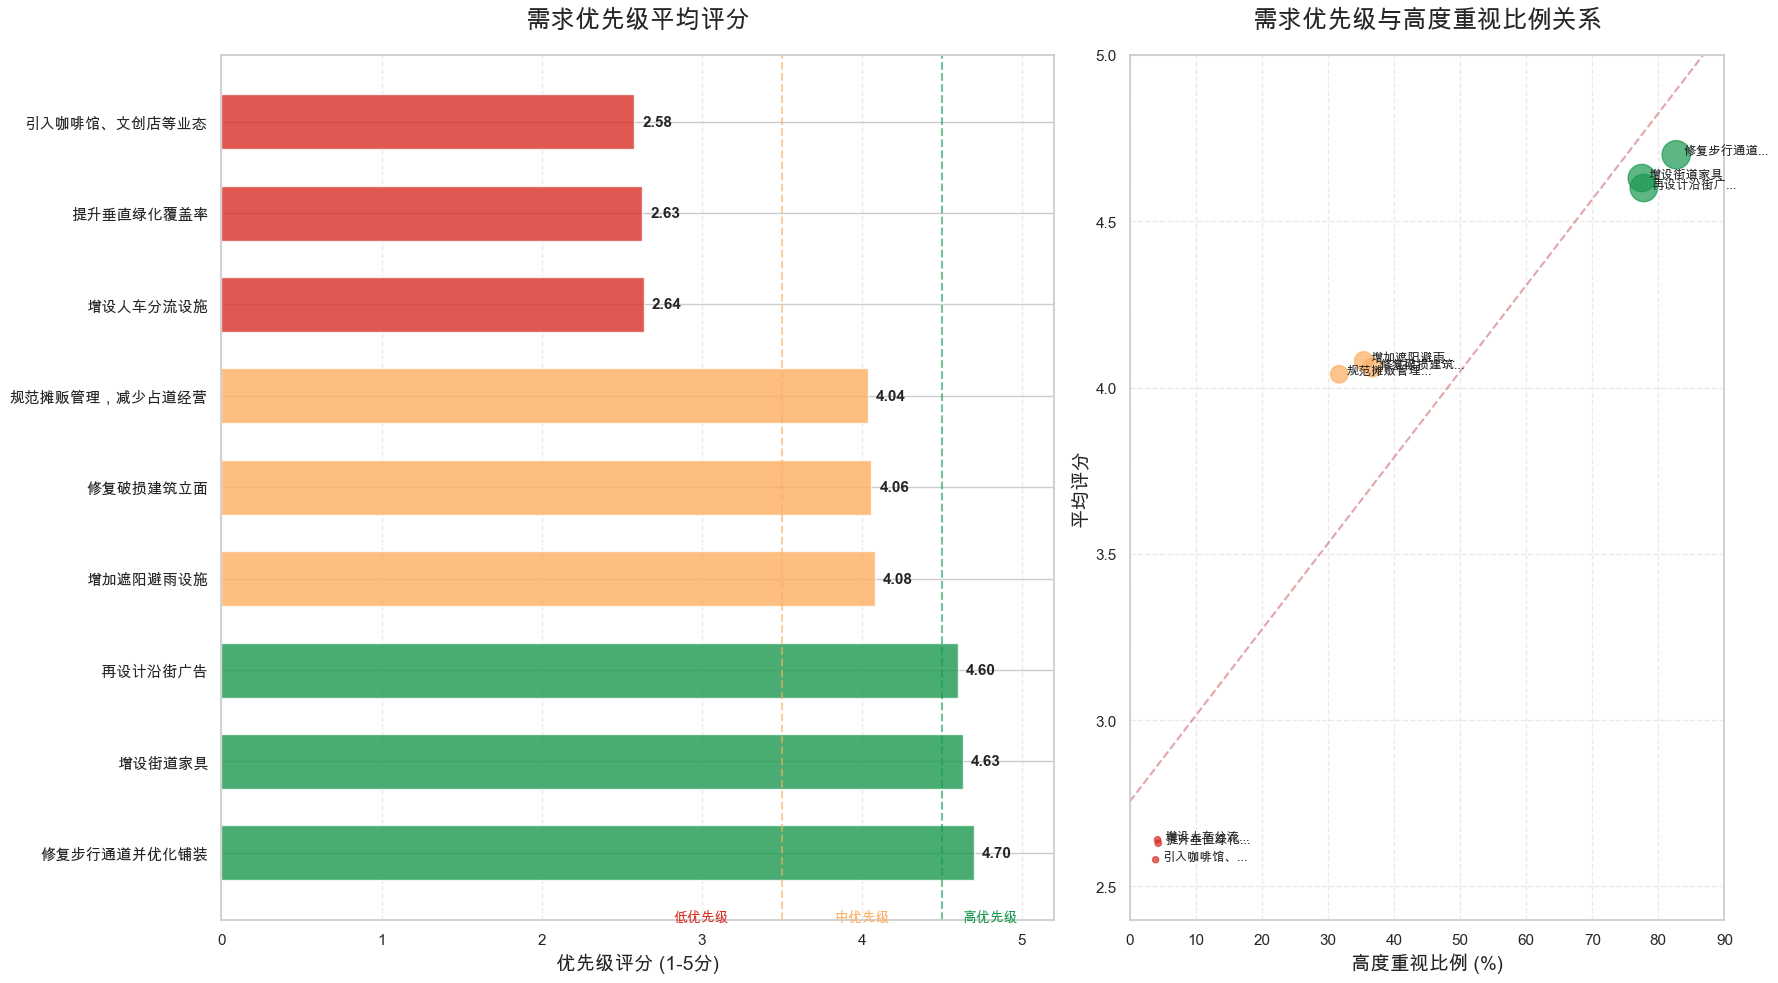

In [37]:
def plot_priority_needs():
    # 设置中文字体
    import os
    from matplotlib.font_manager import FontProperties
    
    # 查找可用的中文字体
    font_candidates = [
        '/Library/Fonts/Arial Unicode.ttf',      # Arial Unicode MS
        '/System/Library/Fonts/PingFang.ttc',    # 苹方
        '/System/Library/Fonts/STHeiti Light.ttc',  # 华文细黑
        '/System/Library/Fonts/STHeiti Medium.ttc',  # 华文中黑
        os.path.expanduser('~/Library/Fonts/SourceHanSansSC-Regular.otf')  # 思源黑体
    ]
    
    chinese_font = None
    for font_path in font_candidates:
        if os.path.exists(font_path):
            chinese_font = FontProperties(fname=font_path)
            print(f"使用字体: {font_path}")
            break
    
    if not chinese_font:
        print("警告：未找到可用的中文字体文件")
    
    # 数据排序
    priority_df_sorted = priority_df.sort_values('平均分', ascending=False)
    
    # 创建一个两列的子图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10), gridspec_kw={'width_ratios': [1.4, 1]})
    
    # 分类需求优先级
    high_priority = priority_df_sorted[priority_df_sorted['平均分'] >= 4.5]
    medium_priority = priority_df_sorted[(priority_df_sorted['平均分'] < 4.5) & (priority_df_sorted['平均分'] >= 3.5)]
    low_priority = priority_df_sorted[priority_df_sorted['平均分'] < 3.5]
    
    # 颜色设置
    high_color = '#1a9850'
    medium_color = '#fdae61'
    low_color = '#d73027'
    
    # 图1：平均分条形图
    colors = []
    for score in priority_df_sorted['平均分']:
        if score >= 4.5:
            colors.append(high_color)
        elif score >= 3.5:
            colors.append(medium_color)
        else:
            colors.append(low_color)
    
    # 使用数字索引替代中文标签
    y_pos = range(len(priority_df_sorted))
    bars = ax1.barh(y_pos, priority_df_sorted['平均分'], color=colors, alpha=0.8, height=0.6)
    
    # 添加数据标签
    for bar in bars:
        width = bar.get_width()
        ax1.text(width + 0.05, bar.get_y() + bar.get_height()/2, 
                f'{width:.2f}', ha='left', va='center', fontsize=11, fontweight='bold')
    
    # 设置Y轴刻度和标签，使用中文字体
    ax1.set_yticks(y_pos)
    if chinese_font:
        ax1.set_yticklabels(priority_df_sorted['需求项'], fontproperties=chinese_font, fontsize=11)
    else:
        ax1.set_yticklabels(priority_df_sorted['需求项'], fontsize=11)
    
    # 添加优先级分界线
    ax1.axvline(x=3.5, color=medium_color, linestyle='--', alpha=0.6, linewidth=1.5)
    ax1.axvline(x=4.5, color=high_color, linestyle='--', alpha=0.6, linewidth=1.5)
    
    # 添加优先级标注，使用中文字体
    if chinese_font:
        ax1.text(3.0, -0.7, '低优先级', ha='center', va='center', fontsize=10, color=low_color, 
                fontproperties=chinese_font)
        ax1.text(4.0, -0.7, '中优先级', ha='center', va='center', fontsize=10, color=medium_color, 
                fontproperties=chinese_font)
        ax1.text(4.8, -0.7, '高优先级', ha='center', va='center', fontsize=10, color=high_color, 
                fontproperties=chinese_font)
        ax1.set_title('需求优先级平均评分', fontproperties=chinese_font, fontsize=18, pad=20)
        ax1.set_xlabel('优先级评分 (1-5分)', fontproperties=chinese_font, fontsize=14)
    else:
        ax1.text(3.0, -0.7, '低优先级', ha='center', va='center', fontsize=10, color=low_color)
        ax1.text(4.0, -0.7, '中优先级', ha='center', va='center', fontsize=10, color=medium_color)
        ax1.text(4.8, -0.7, '高优先级', ha='center', va='center', fontsize=10, color=high_color)
        ax1.set_title('需求优先级平均评分', fontsize=18, pad=20)
        ax1.set_xlabel('优先级评分 (1-5分)', fontsize=14)
    
    ax1.set_xlim(0, 5.2)
    ax1.grid(axis='x', linestyle='--', alpha=0.4)
    
    # 图2：高度重视比例散点图
    ax2.scatter(priority_df_sorted['高度重视比例'], priority_df_sorted['平均分'], 
               s=priority_df_sorted['高度重视比例']*5, alpha=0.7, c=colors)
    
    # 添加项目标签，使用中文字体
    for i, txt in enumerate(priority_df_sorted['需求项']):
        # 简化标签文本，避免拥挤
        short_txt = txt[:6] + '...' if len(txt) > 6 else txt
        if chinese_font:
            ax2.annotate(short_txt, 
                       (priority_df_sorted['高度重视比例'].iloc[i], priority_df_sorted['平均分'].iloc[i]),
                       xytext=(5, 0), textcoords='offset points', fontsize=9,
                       fontproperties=chinese_font)
        else:
            ax2.annotate(short_txt, 
                       (priority_df_sorted['高度重视比例'].iloc[i], priority_df_sorted['平均分'].iloc[i]),
                       xytext=(5, 0), textcoords='offset points', fontsize=9)
    
    # 设置标题和标签，使用中文字体
    if chinese_font:
        ax2.set_title('需求优先级与高度重视比例关系', fontproperties=chinese_font, fontsize=18, pad=20)
        ax2.set_xlabel('高度重视比例 (%)', fontproperties=chinese_font, fontsize=14)
        ax2.set_ylabel('平均评分', fontproperties=chinese_font, fontsize=14)
    else:
        ax2.set_title('需求优先级与高度重视比例关系', fontsize=18, pad=20)
        ax2.set_xlabel('高度重视比例 (%)', fontsize=14)
        ax2.set_ylabel('平均评分', fontsize=14)
    
    ax2.set_xlim(0, 90)
    ax2.set_ylim(2.4, 5.0)
    ax2.grid(True, linestyle='--', alpha=0.4)
    
    # 添加趋势线
    z = np.polyfit(priority_df_sorted['高度重视比例'], priority_df_sorted['平均分'], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(0, 90, 100)
    ax2.plot(x_trend, p(x_trend), "r--", alpha=0.5)
    
    plt.tight_layout()
    plt.savefig('priority_needs_analysis.png', dpi=300, bbox_inches='tight')
    print("已保存图表: priority_needs_analysis.png")
    plt.show()
plot_priority_needs()

街道环境改善需求优先级分析
该图表包含两部分：左侧展示了各项改善措施的优先级平均评分，右侧展示了需求优先级与高度重视比例的关系矩阵图。
左侧：需求优先级平均评分分析
根据1-5分的评分体系（5分表示最高优先级），各项改善需求可分为三个优先级别：
高优先级需求（>4.5分）：
修复步行通道并优化铺装：4.70分，优先级最高
增设街道家具：4.63分
再设计沿街广告：4.60分
中优先级需求（4-4.5分）：
增加遮阳避雨设施：4.08分
修复破损建筑立面：4.06分
规范摊贩管理，减少占道经营：4.04分
低优先级需求（<3分）：
增设人车分流设施：2.64分
提升垂直绿化覆盖率：2.63分
引入咖啡馆、文创店等业态：2.58分，优先级最低右侧：需求优先级与重视度矩阵分析
右侧散点图展示了各项改善措施的优先级得分（纵轴）与高度重视比例（横轴）的关系：
关键观察点：
高优先级高重视度项目（右上角）：
修复步行通道并优化铺装（~4.7分，~80%重视度）
增设街道家具（~4.6分，~80%重视度）
再设计沿街广告（~4.6分，~75%重视度）
中优先级中重视度项目（中部）：
规范摊贩管理与减少占道经营（~4.0分，~40%重视度）
修复破损建筑立面（~4.1分，~35%重视度）
增加遮阳避雨设施（~4.1分，~35%重视度）
低优先级低重视度项目（左下角）：
增设人车分流设施（~2.6分，~20%重视度）
引入咖啡馆、文创店等业态（~2.6分，~15%重视度）
提升垂直绿化覆盖率（~2.6分，~10%重视度）
优先级与重视度正相关：图表中的虚线表示正相关趋势，即优先级评分高的项目通常也有更高比例的人对其高度重视
综合分析与结论
基础设施改善需求最迫切：修复步行通道和增设街道家具是优先级最高且重视度最高的两项，表明基础设施的改善是公众最关心的问题
视觉环境整治需求强烈：再设计沿街广告和修复破损建筑立面都获得较高评分，表明城市视觉环境的改善也备受重视
功能性设施优于美化项目：实用性强的设施（如步行通道、街道家具、遮阳避雨设施）的优先级普遍高于美化性项目（如垂直绿化）
商业业态引入不受重视：引入咖啡馆、文创店等新业态的优先级评分和重视度均较低，表明公众更关注基础设施和环境改善而非商业形态变化
优先实施策略明确：
第一阶段：应优先实施右上角三个项目（步行通道修复、街道家具增设、沿街广告再设计）
第二阶段：实施中部三个项目（摊贩管理、建筑立面修复、遮阳避雨设施）
第三阶段：考虑低优先级项目（人车分流设施、垂直绿化、业态引入）
公众需求与专业规划的结合点：数据显示公众更注重直接影响日常使用体验的设施改善，这为城市规划提供了明确的公众参与反馈，有助于制定更符合居民实际需求的街道改善计划

使用字体: /Library/Fonts/Arial Unicode.ttf
已保存图表: region_differences.png


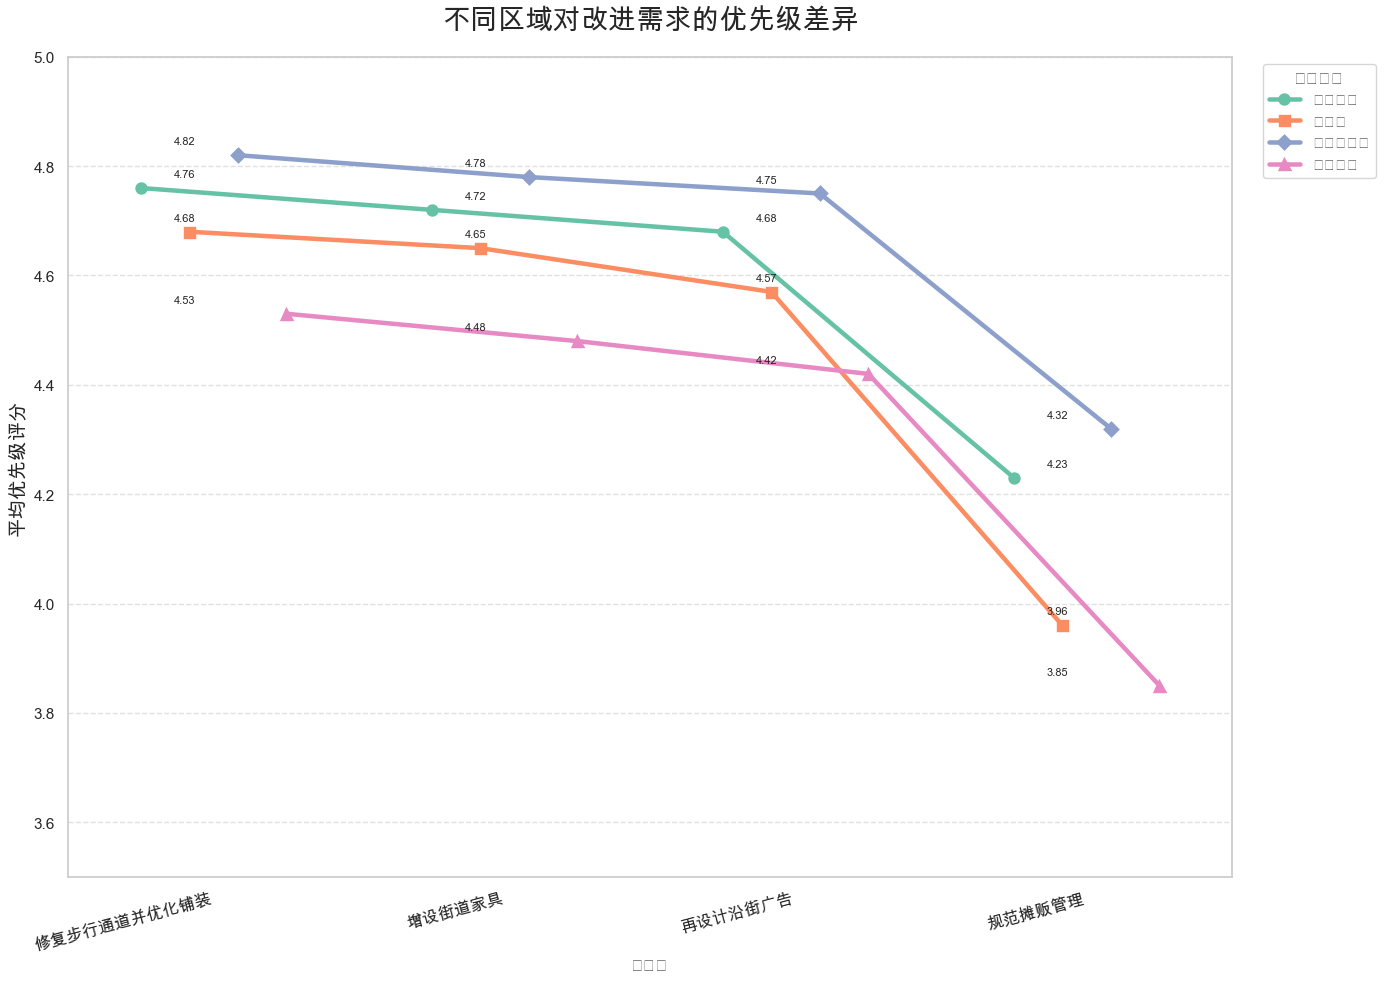

In [38]:
def plot_region_differences():
    # 设置中文字体
    import os
    from matplotlib.font_manager import FontProperties
    
    # 查找可用的中文字体
    font_candidates = [
        '/Library/Fonts/Arial Unicode.ttf',      # Arial Unicode MS
        '/System/Library/Fonts/PingFang.ttc',    # 苹方
        '/System/Library/Fonts/STHeiti Light.ttc',  # 华文细黑
        '/System/Library/Fonts/STHeiti Medium.ttc',  # 华文中黑
        os.path.expanduser('~/Library/Fonts/SourceHanSansSC-Regular.otf')  # 思源黑体
    ]
    
    chinese_font = None
    for font_path in font_candidates:
        if os.path.exists(font_path):
            chinese_font = FontProperties(fname=font_path)
            print(f"使用字体: {font_path}")
            break
    
    if not chinese_font:
        print("警告：未找到可用的中文字体文件")
    
    # 转换数据格式，便于绘图
    region_df_melted = pd.melt(region_priority_df, id_vars=['需求项'], 
                              var_name='区域', value_name='评分')
    
    # 创建图形
    plt.figure(figsize=(14, 10))
    
    # 使用seaborn的点图，显示不同区域的差异
    ax = sns.pointplot(x='需求项', y='评分', hue='区域', data=region_df_melted, 
                      palette="Set2", scale=1.2, dodge=0.5, markers=["o", "s", "D", "^"])
    
    # 添加网格线
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    # 设置标题和标签，使用中文字体
    if chinese_font:
        plt.title('不同区域对改进需求的优先级差异', fontproperties=chinese_font, fontsize=20, pad=20)
        plt.ylabel('平均优先级评分', fontproperties=chinese_font, fontsize=14)
        
        # 修改X轴标签
        labels = [item.get_text() for item in ax.get_xticklabels()]
        ax.set_xticklabels(labels, fontproperties=chinese_font, rotation=15, ha='right')
        
        # 修改图例标签
        legend = ax.get_legend()
        for text in legend.texts:
            text.set_fontproperties(chinese_font)
        legend.set_title('区域类型')
        legend.get_title().set_fontproperties(chinese_font)
    else:
        plt.title('不同区域对改进需求的优先级差异', fontsize=20, pad=20)
        plt.ylabel('平均优先级评分', fontsize=14)
        plt.xticks(rotation=15, ha='right')
        
    plt.ylim(3.5, 5.0)  # 设置Y轴范围以突出差异
    
    # 移动图例到图的右上方
    plt.legend(title='区域类型', bbox_to_anchor=(1.02, 1), loc='upper left')
    
    # 为每个点添加数据标签
    for i, row in region_df_melted.iterrows():
        plt.text(i % 4 - 0.1, row['评分'] + 0.02, f"{row['评分']:.2f}", 
                fontsize=8, ha='center')
    
    plt.tight_layout()
    plt.savefig('region_differences.png', dpi=300, bbox_inches='tight')
    print("已保存图表: region_differences.png")
    plt.show()

plot_region_differences()

不同区域对改进需求优先级差异分析
这张图表展示了四个不同区域（商业区、居住区、历史文化街区、交通枢纽）对四项城市改进措施（修复步行通道并优化铺装、增设街道家具、再设计沿街广告、规范摊贩管理）的优先级评分差异。评分采用5分制，分数越高表示优先级越高。
各区域整体优先级偏好分析
历史文化街区：整体评分最高（平均约4.62分），对所有改进措施都给予了较高优先级，特别是对步行通道修复（4.82分）和街道家具增设（4.78分）的需求最为迫切
商业区：整体评分次之（平均约4.60分），四项措施的优先级评分较为平均，但对步行通道修复（4.76分）的需求最高，对摊贩管理（4.23分）的需求相对较低
居住区：整体评分第三（平均约4.47分），对步行通道修复（4.68分）和街道家具增设（4.65分）的需求较高，对摊贩管理（3.96分）的需求明显降低
交通枢纽：整体评分最低（平均约4.32分），所有改进措施的优先级均低于其他区域，对摊贩管理（3.85分）的优先级最低
各改进措施的区域差异分析
修复步行通道并优化铺装：
所有区域普遍评分最高（4.53-4.82分）
历史文化街区（4.82分）> 商业区（4.76分）> 居住区（4.68分）> 交通枢纽（4.53分）
区域间差异相对较小（最大差距0.29分）
增设街道家具：
各区域评分次高（4.48-4.78分）
历史文化街区（4.78分）> 商业区（4.72分）> 居住区（4.65分）> 交通枢纽（4.48分）
区域间差异适中（最大差距0.30分）
再设计沿街广告：
各区域评分第三（4.42-4.75分）
历史文化街区（4.75分）> 商业区（4.68分）> 居住区（4.57分）> 交通枢纽（4.42分）
区域间差异扩大（最大差距0.33分）
规范摊贩管理：
所有区域评分最低（3.85-4.32分）
历史文化街区（4.32分）> 商业区（4.23分）> 居住区（3.96分）> 交通枢纽（3.85分）
区域间差异最大（最大差距0.47分），且与其他三项措施相比，各区域对该项评分明显降低
趋势特点分析
一致性趋势：所有区域对四项措施的优先级排序基本一致（步行通道 > 街道家具 > 沿街广告 > 摊贩管理）
区域优先级稳定性：历史文化街区在所有改进措施上始终保持最高优先级，交通枢纽则始终最低
评分断崖效应：从"再设计沿街广告"到"规范摊贩管理"，所有区域的优先级评分都出现明显下降，表明前三项改进措施与摊贩管理在公众心中有明显的优先级差距
差异扩大趋势：随着改进措施优先级的整体降低，区域间的评分差异逐渐扩大，表明不同区域对低优先级措施的需求差异更为明显
实践启示
通用优先策略：步行通道修复和街道家具增设在所有区域都是高优先级需求，可作为城市更新的共同优先事项
区域差异化策略：
历史文化街区：应特别注重全面改善，尤其是步行环境和街道家具
商业区：需平衡发展各项措施，但可略微侧重步行环境改善
居住区：可侧重改善步行通道和增设街道家具，摊贩管理可相对降低优先级
交通枢纽：虽然各项评分较低，但步行通道改善仍应优先考虑
资源分配建议：对摊贩管理的投入可适当降低，尤其在交通枢纽和居住区，而将更多资源投入到步行环境和街道设施的改善上
总体而言，数据显示尽管各区域对改进措施的优先级评分存在差异，但基本趋势相似，这为城市规划提供了既有共性又有区别的改进策略参考。

使用字体: /Library/Fonts/Arial Unicode.ttf
已保存图表: cultural_attitudes_analysis.png


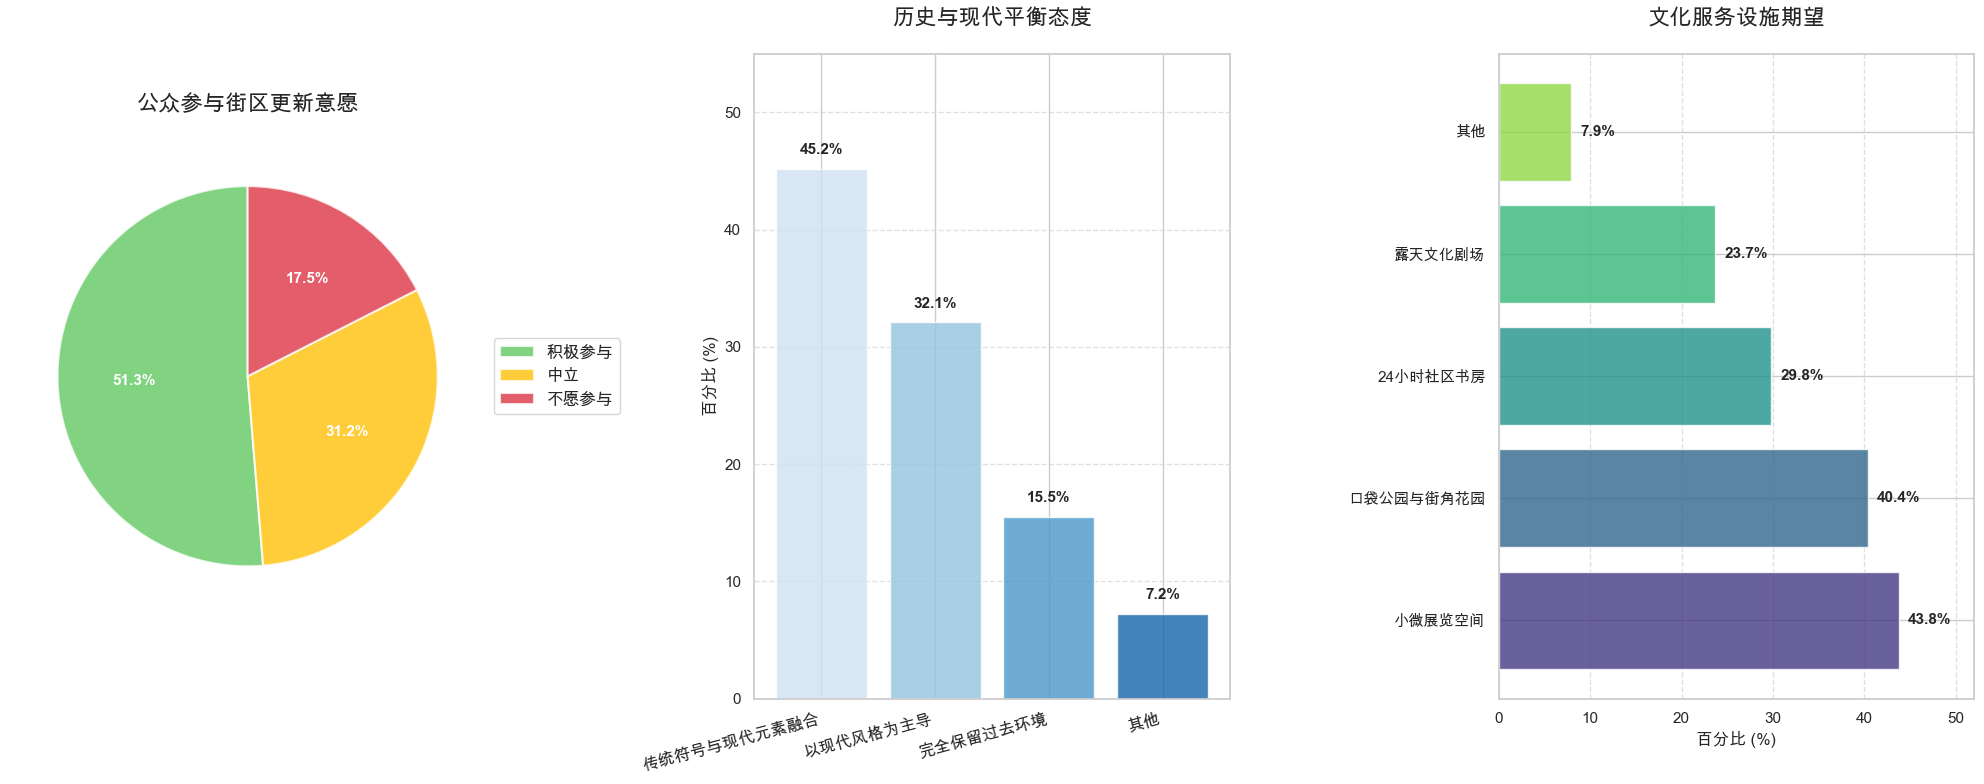

In [39]:
def plot_cultural_attitudes():
    # 设置中文字体
    import os
    from matplotlib.font_manager import FontProperties
    
    # 查找可用的中文字体
    font_candidates = [
        '/Library/Fonts/Arial Unicode.ttf',      # Arial Unicode MS
        '/System/Library/Fonts/PingFang.ttc',    # 苹方
        '/System/Library/Fonts/STHeiti Light.ttc',  # 华文细黑
        '/System/Library/Fonts/STHeiti Medium.ttc',  # 华文中黑
        os.path.expanduser('~/Library/Fonts/SourceHanSansSC-Regular.otf')  # 思源黑体
    ]
    
    chinese_font = None
    for font_path in font_candidates:
        if os.path.exists(font_path):
            chinese_font = FontProperties(fname=font_path)
            print(f"使用字体: {font_path}")
            break
    
    if not chinese_font:
        print("警告：未找到可用的中文字体文件")
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))
    
    # 图1：公众参与意愿
    # 组合正面和负面态度
    positive = participation_df.loc[participation_df['态度'].isin(['非常愿意', '愿意']), '比例'].sum()
    neutral = participation_df.loc[participation_df['态度'] == '中立', '比例'].sum()
    negative = participation_df.loc[participation_df['态度'].isin(['不愿意', '非常不愿意']), '比例'].sum()
    
    summary_data = pd.DataFrame({
        '态度类型': ['积极参与', '中立', '不愿参与'],
        '比例': [positive, neutral, negative]
    })
    
    # 创建饼图 - 不直接使用标签，稍后通过图例添加
    wedges, texts, autotexts = ax1.pie(summary_data['比例'], 
                                     labels=None,  # 不直接设置标签
                                     autopct='%1.1f%%',
                                     startangle=90, 
                                     colors=['#62c962', '#ffc107', '#dc3545'],
                                     wedgeprops={'edgecolor': 'white', 'linewidth': 1.5, 'alpha': 0.8})
    
    # 添加带中文字体的图例
    if chinese_font:
        ax1.legend(wedges, summary_data['态度类型'], 
                  loc='center left', 
                  bbox_to_anchor=(1, 0.5),
                  prop=chinese_font)
    else:
        ax1.legend(wedges, summary_data['态度类型'], 
                  loc='center left', 
                  bbox_to_anchor=(1, 0.5))
    
    # 设置饼图中的文本样式
    for autotext in autotexts:
        autotext.set_fontsize(11)
        autotext.set_fontweight('bold')
        autotext.set_color('white')
    
    # 设置标题，使用中文字体
    if chinese_font:
        ax1.set_title('公众参与街区更新意愿', fontproperties=chinese_font, fontsize=16, pad=20)
    else:
        ax1.set_title('公众参与街区更新意愿', fontsize=16, pad=20)
    
    # 图2：历史与现代平衡态度
    # 使用数字索引代替中文标签
    x_pos = range(len(balance_df))
    bars = ax2.bar(x_pos, balance_df['比例'], 
                  color=sns.color_palette("Blues", len(balance_df)), alpha=0.8)
    
    # 添加数据标签
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # 自定义X轴标签，使用中文字体
    ax2.set_xticks(x_pos)
    if chinese_font:
        ax2.set_xticklabels(balance_df['设计理念'], rotation=15, ha='right', fontsize=10, 
                          fontproperties=chinese_font)
        ax2.set_ylabel('百分比 (%)', fontproperties=chinese_font, fontsize=12)
        ax2.set_title('历史与现代平衡态度', fontproperties=chinese_font, fontsize=16, pad=20)
    else:
        ax2.set_xticklabels(balance_df['设计理念'], rotation=15, ha='right', fontsize=10)
        ax2.set_ylabel('百分比 (%)', fontsize=12)
        ax2.set_title('历史与现代平衡态度', fontsize=16, pad=20)
    
    ax2.set_ylim(0, 55)  # 设置Y轴范围
    
    # 添加网格线
    ax2.grid(axis='y', linestyle='--', alpha=0.6)
    
    # 图3：文化设施需求
    # 排序数据
    facility_df_sorted = facility_df.sort_values('比例', ascending=False)
    
    # 使用数字索引替代中文标签
    y_pos = range(len(facility_df_sorted))
    
    # 创建带有标签的水平条形图
    bars = ax3.barh(y_pos, facility_df_sorted['比例'], 
                   color=sns.color_palette("viridis", len(facility_df_sorted)), alpha=0.8)
    
    # 添加数据标签
    for bar in bars:
        width = bar.get_width()
        ax3.text(width + 1, bar.get_y() + bar.get_height()/2, 
                f'{width:.1f}%', ha='left', va='center', fontsize=11, fontweight='bold')
    
    # 设置Y轴刻度和标签，使用中文字体
    ax3.set_yticks(y_pos)
    if chinese_font:
        ax3.set_yticklabels(facility_df_sorted['设施类型'], fontproperties=chinese_font, fontsize=11)
        ax3.set_xlabel('百分比 (%)', fontproperties=chinese_font, fontsize=12)
        ax3.set_title('文化服务设施期望', fontproperties=chinese_font, fontsize=16, pad=20)
    else:
        ax3.set_yticklabels(facility_df_sorted['设施类型'], fontsize=11)
        ax3.set_xlabel('百分比 (%)', fontsize=12)
        ax3.set_title('文化服务设施期望', fontsize=16, pad=20)
    
    ax3.set_xlim(0, 52)  # 设置X轴范围
    
    # 添加网格线
    ax3.grid(axis='x', linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.savefig('cultural_attitudes_analysis.png', dpi=300, bbox_inches='tight')
    print("已保存图表: cultural_attitudes_analysis.png")
    plt.show()

plot_cultural_attitudes()

这张图表包含三个子图，分别展示了公众对城市更新参与意愿、对历史与现代平衡的态度，以及对文化服务设施的期望。
1. 公众参与街区更新意愿（左图）
左侧饼图展示了公众参与街区更新的态度分布：
积极参与：51.3%，超过半数的受访者表示愿意积极参与街区更新
中立：31.2%，约三分之一的受访者持中立态度
不愿参与：17.5%，少数受访者明确表示不愿参与
数据表明公众参与意愿总体较高，积极和中立态度合计达82.5%，这为基于公众参与的城市更新提供了良好的民意基础。
2. 历史与现代平衡态度（中图）
中间条形图显示了受访者对历史保护与现代发展平衡关系的态度：
传统府与现代元素融合：45.2%，最受欢迎的选项
以现代风格为主导：32.1%，第二受欢迎的选项
完全保留过去环境：15.5%，占比较小
其他：7.2%，最少数
数据显示多数民众（45.2%）倾向于传统与现代的融合策略，而非完全偏向任何一方。同时，偏向现代风格（32.1%）的受访者数量明显多于主张完全保留历史环境（15.5%）的人群，表明公众总体上更接受具有现代元素的城市风貌。
3. 文化服务设施期望（右图）
右侧条形图展示了公众对不同文化服务设施的期望程度：
小微展览空间：43.8%，最受期待的文化设施
口袋公园与街角花园：40.4%，第二受欢迎的设施
24小时社区书房：29.8%，中等程度期待
露天文化剧场：23.7%，较低期待度
其他：7.9%，最低期待度
数据表明公众更偏好小型、分散式、融入日常生活的文化空间（如小微展览空间和口袋公园），而非大型集中式文化设施（如露天文化剧场）。这反映了当前城市居民对于"微文化空间"的偏好趋势。
综合分析与启示
公众参与意识强烈：超过一半的受访者愿意积极参与街区更新，说明公众对城市环境改善有较高的主人翁意识和责任感
融合发展理念获认同：近半数受访者支持传统与现代元素融合的发展方式，表明"创新性保护"和"有机更新"的理念已获得较广泛认同
现代性倾向明显：支持以现代风格为主导（32.1%）的比例显著高于完全保留历史环境（15.5%）的比例，表明公众在保护历史的同时也希望提升城市的现代功能与品质
小型分散式文化空间受偏好：小微展览空间和口袋公园等小型、亲民的文化空间受到较高关注，表明居民更关注贴近日常生活的文化服务体验
政策建议：
应建立更多渠道鼓励公众参与城市更新过程
在历史街区改造中采取"传统与现代融合"的策略，既保留历史风貌又融入现代功能
优先发展小型、分散式文化空间，如小微展览空间、口袋公园和社区书房，提升居民的日常文化体验
根据公众参与意愿差异，针对不同群体设计多层次参与机制，将"不愿参与"群体转化为"中立"或"积极参与"
总体而言，数据反映了公众对城市文化环境建设的前瞻性认知和务实态度，既重视历史文化保护，也关注现代生活品质和文化服务可及性。

使用字体: /Library/Fonts/Arial Unicode.ttf
已保存图表: satisfaction_radar.png


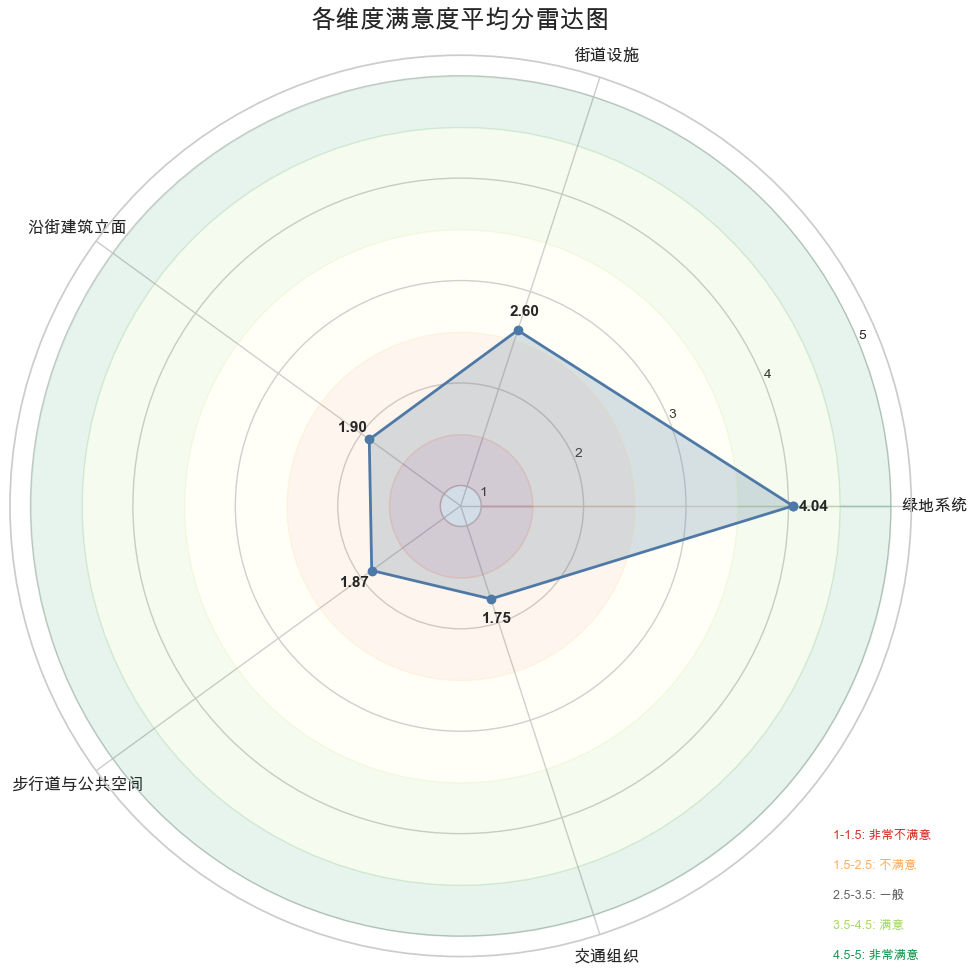

In [41]:
def plot_satisfaction_radar():
    # 设置中文字体
    import os
    from matplotlib.font_manager import FontProperties
    
    # 查找可用的中文字体
    font_candidates = [
        '/Library/Fonts/Arial Unicode.ttf',      # Arial Unicode MS
        '/System/Library/Fonts/PingFang.ttc',    # 苹方
        '/System/Library/Fonts/STHeiti Light.ttc',  # 华文细黑
        '/System/Library/Fonts/STHeiti Medium.ttc',  # 华文中黑
        os.path.expanduser('~/Library/Fonts/SourceHanSansSC-Regular.otf')  # 思源黑体
    ]
    
    chinese_font = None
    for font_path in font_candidates:
        if os.path.exists(font_path):
            chinese_font = FontProperties(fname=font_path)
            print(f"使用字体: {font_path}")
            break
    
    if not chinese_font:
        print("警告：未找到可用的中文字体文件")
    
    # 准备雷达图数据 - 按维度分类平均
    dimensions = satisfaction_df['维度分类'].unique()
    avg_scores = []
    
    for dim in dimensions:
        avg = satisfaction_df[satisfaction_df['维度分类'] == dim]['平均分'].mean()
        avg_scores.append(avg)
    
    # 创建DataFrame
    radar_df = pd.DataFrame({
        '维度': dimensions,
        '平均分': avg_scores
    })
    
    # 设置雷达图
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, polar=True)
    
    # 计算角度
    angles = np.linspace(0, 2*np.pi, len(radar_df), endpoint=False).tolist()
    # 闭合雷达图
    values = radar_df['平均分'].tolist()
    values += values[:1]
    angles += angles[:1]
    
    # 绘制雷达图线条
    ax.plot(angles, values, 'o-', linewidth=2, color='#4E79A7')
    ax.fill(angles, values, alpha=0.25, color='#4E79A7')
    
    # 设置雷达图刻度
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_yticklabels(['1', '2', '3', '4', '5'], fontsize=10)
    
    # 设置雷达图轴标签，使用中文字体
    ax.set_xticks(angles[:-1])
    if chinese_font:
        ax.set_xticklabels(dimensions, fontproperties=chinese_font, fontsize=12)
    else:
        ax.set_xticklabels(dimensions, fontsize=12)
    
    # 添加彩色背景区域表示不同满意度等级
    # 非常不满意区域 (1-1.5)
    ax.fill_between(np.linspace(0, 2*np.pi, 100), 1, 1.5, 
                    color='#d73027', alpha=0.1)
    # 不满意区域 (1.5-2.5)
    ax.fill_between(np.linspace(0, 2*np.pi, 100), 1.5, 2.5, 
                    color='#fdae61', alpha=0.1)
    # 一般区域 (2.5-3.5)
    ax.fill_between(np.linspace(0, 2*np.pi, 100), 2.5, 3.5, 
                    color='#ffffbf', alpha=0.1)
    # 满意区域 (3.5-4.5)
    ax.fill_between(np.linspace(0, 2*np.pi, 100), 3.5, 4.5, 
                    color='#a6d96a', alpha=0.1)
    # 非常满意区域 (4.5-5)
    ax.fill_between(np.linspace(0, 2*np.pi, 100), 4.5, 5, 
                    color='#1a9850', alpha=0.1)
    
    # 添加满意度等级标注，使用中文字体
    if chinese_font:
        plt.figtext(0.85, 0.15, '1-1.5: 非常不满意', fontsize=9, color='#d73027', 
                  fontproperties=chinese_font)
        plt.figtext(0.85, 0.12, '1.5-2.5: 不满意', fontsize=9, color='#fdae61', 
                  fontproperties=chinese_font)
        plt.figtext(0.85, 0.09, '2.5-3.5: 一般', fontsize=9, color='#666666', 
                  fontproperties=chinese_font)
        plt.figtext(0.85, 0.06, '3.5-4.5: 满意', fontsize=9, color='#a6d96a', 
                  fontproperties=chinese_font)
        plt.figtext(0.85, 0.03, '4.5-5: 非常满意', fontsize=9, color='#1a9850', 
                  fontproperties=chinese_font)
    else:
        plt.figtext(0.85, 0.15, '1-1.5: 非常不满意', fontsize=9, color='#d73027')
        plt.figtext(0.85, 0.12, '1.5-2.5: 不满意', fontsize=9, color='#fdae61')
        plt.figtext(0.85, 0.09, '2.5-3.5: 一般', fontsize=9, color='#666666')
        plt.figtext(0.85, 0.06, '3.5-4.5: 满意', fontsize=9, color='#a6d96a')
        plt.figtext(0.85, 0.03, '4.5-5: 非常满意', fontsize=9, color='#1a9850')
    
    # 在每个点上添加数值标签
    for i, value in enumerate(values[:-1]):
        angle = angles[i]
        ax.text(angle, value + 0.2, f'{value:.2f}', 
                ha='center', va='center', fontsize=11, fontweight='bold')
    
    # 设置标题，使用中文字体
    if chinese_font:
        plt.title('各维度满意度平均分雷达图', fontproperties=chinese_font, fontsize=18, pad=20)
    else:
        plt.title('各维度满意度平均分雷达图', fontsize=18, pad=20)
    
    plt.tight_layout()
    plt.savefig('satisfaction_radar.png', dpi=300, bbox_inches='tight')
    print("已保存图表: satisfaction_radar.png")
    plt.show()
plot_satisfaction_radar()

各维度满意度得分分析
按照满意度从高到低排序：
绿地系统：4.04分，处于"满意"水平，是所有维度中唯一超过4分的项目
街道设施：2.60分，处于"一般"水平
沿街建筑立面：1.90分，处于"不满意"水平
步行道与公共空间：1.87分，处于"不满意"水平
交通组织：1.75分，处于"不满意"水平，是所有维度中评分最低的项目
满意度分布特征
根据雷达图的分布形状和图例颜色区分：
高满意度区域（3.5-5分，浅绿色区域）：仅绿地系统一项，占据了满意区间
中等满意度区域（2.5-3.5分，浅黄色区域）：仅街道设施略微进入此区间
低满意度区域（1-2.5分，粉红色区域）：沿街建筑立面、步行道与公共空间、交通组织三项全部处于不满意区间
城市环境评价不平衡性
极端不平衡：评分最高的绿地系统（4.04分）与最低的交通组织（1.75分）之间存在2.29分的巨大差距，表明街道环境质量在不同维度上极不平衡
"一高四低"格局：除绿地系统外，其余四个维度的评分均低于3分（中等水平），形成了明显的"一高四低"评价格局
雷达图呈"单尖变形状"：呈现向绿地系统方向高度延伸，而在其他方向均较为收缩的不规则形状，反映了街道环境的严重失衡
各维度问题剖析
绿地系统（4.04分）：唯一获得积极评价的维度，表明在绿化建设方面取得了较好成效，可能包括行道树、绿地、花坛等方面的良好表现
街道设施（2.60分）：勉强达到"一般"水平，但仍有明显提升空间，可能包括座椅、照明、垃圾桶等基础设施不足或维护不良的问题
沿街建筑立面（1.90分）：表现不佳，可能存在建筑风格不协调、立面破损、违规广告牌匾、色彩搭配不当等问题
步行道与公共空间（1.87分）：满意度极低，可能存在步行道破损、宽度不足、障碍物多、公共空间缺乏等问题
交通组织（1.75分）：最令人不满的方面，可能包括机动车占道、交通拥堵、停车管理混乱、人车冲突等问题
改进策略建议
维持绿地优势：继续保持和强化绿地系统的优势，作为城市街道环境的亮点
均衡发展策略：重点关注评分最低的三个方面（交通组织、步行道与公共空间、沿街建筑立面），优先分配资源进行改善
系统性整治：针对交通组织（1.75分）的整体性改造最为迫切，应采取系统性措施重新规划交通流线，解决人车冲突
短期改进目标：提升步行道与公共空间（1.87分）可能是短期内较容易见效的改进方向，如修复破损步道、清理障碍物、增设休憩空间等
协同提升街景：沿街建筑立面（1.90分）与街道设施（2.60分）的协同改善，可显著提升整体街道环境观感
总结
该雷达图揭示了街道环境评价的显著不平衡性，反映了城市建设过程中可能过于注重绿化美化而忽视基础功能设施的问题。未来的街道环境改善应从提升交通组织和步行环境入手，采取更加均衡的发展策略，使各维度评分趋于平衡，从而提高街道环境的整体质量。

使用字体: /Library/Fonts/Arial Unicode.ttf
已保存图表: landscape_damage_analysis.png


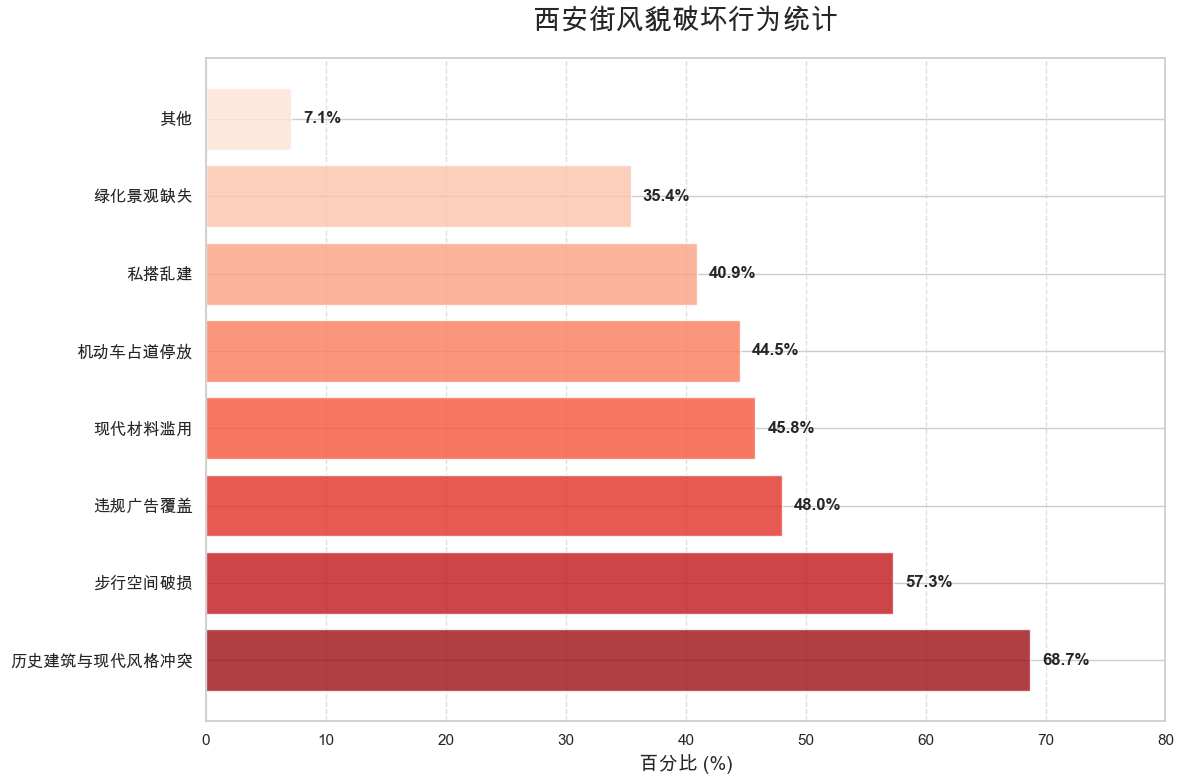

In [ ]:
def plot_landscape_damage():
    # 设置中文字体
    import os
    from matplotlib.font_manager import FontProperties
    
    # 查找可用的中文字体
    font_candidates = [
        '/Library/Fonts/Arial Unicode.ttf',      # Arial Unicode MS
        '/System/Library/Fonts/PingFang.ttc',    # 苹方
        '/System/Library/Fonts/STHeiti Light.ttc',  # 华文细黑
        '/System/Library/Fonts/STHeiti Medium.ttc',  # 华文中黑
        os.path.expanduser('~/Library/Fonts/SourceHanSansSC-Regular.otf')  # 思源黑体
    ]
    
    chinese_font = None
    for font_path in font_candidates:
        if os.path.exists(font_path):
            chinese_font = FontProperties(fname=font_path)
            print(f"使用字体: {font_path}")
            break
    
    if not chinese_font:
        print("警告：未找到可用的中文字体文件")
    
    plt.figure(figsize=(12, 8))
    
    # 排序数据
    damage_df_sorted = damage_df.sort_values('百分比', ascending=False)
    
    # 创建水平条形图，用数字索引替代中文标签
    y_pos = range(len(damage_df_sorted))
    bars = plt.barh(y_pos, damage_df_sorted['百分比'], 
                  color=sns.color_palette("Reds_r", len(damage_df_sorted)), alpha=0.8)
    
    # 添加数据标签
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 1, bar.get_y() + bar.get_height()/2, 
                f'{width:.1f}%', ha='left', va='center', fontsize=12, fontweight='bold')
    
    # 设置Y轴刻度和标签，使用中文字体
    plt.yticks(y_pos)
    if chinese_font:
        plt.gca().set_yticklabels(damage_df_sorted['破坏行为'], fontproperties=chinese_font, fontsize=12)
        plt.title('西安街风貌破坏行为统计', fontproperties=chinese_font, fontsize=20, pad=20)
        plt.xlabel('百分比 (%)', fontproperties=chinese_font, fontsize=14)
    else:
        plt.gca().set_yticklabels(damage_df_sorted['破坏行为'], fontsize=12)
        plt.title('西安街风貌破坏行为统计', fontsize=20, pad=20)
        plt.xlabel('百分比 (%)', fontsize=14)
    
    plt.xlim(0, 80)  # 设置X轴范围
    
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.savefig('landscape_damage_analysis.png', dpi=300, bbox_inches='tight')
    print("已保存图表: landscape_damage_analysis.png")
    plt.show()
plot_landscape_damage()

使用字体: /Library/Fonts/Arial Unicode.ttf
已保存图表: satisfaction_heatmap.png


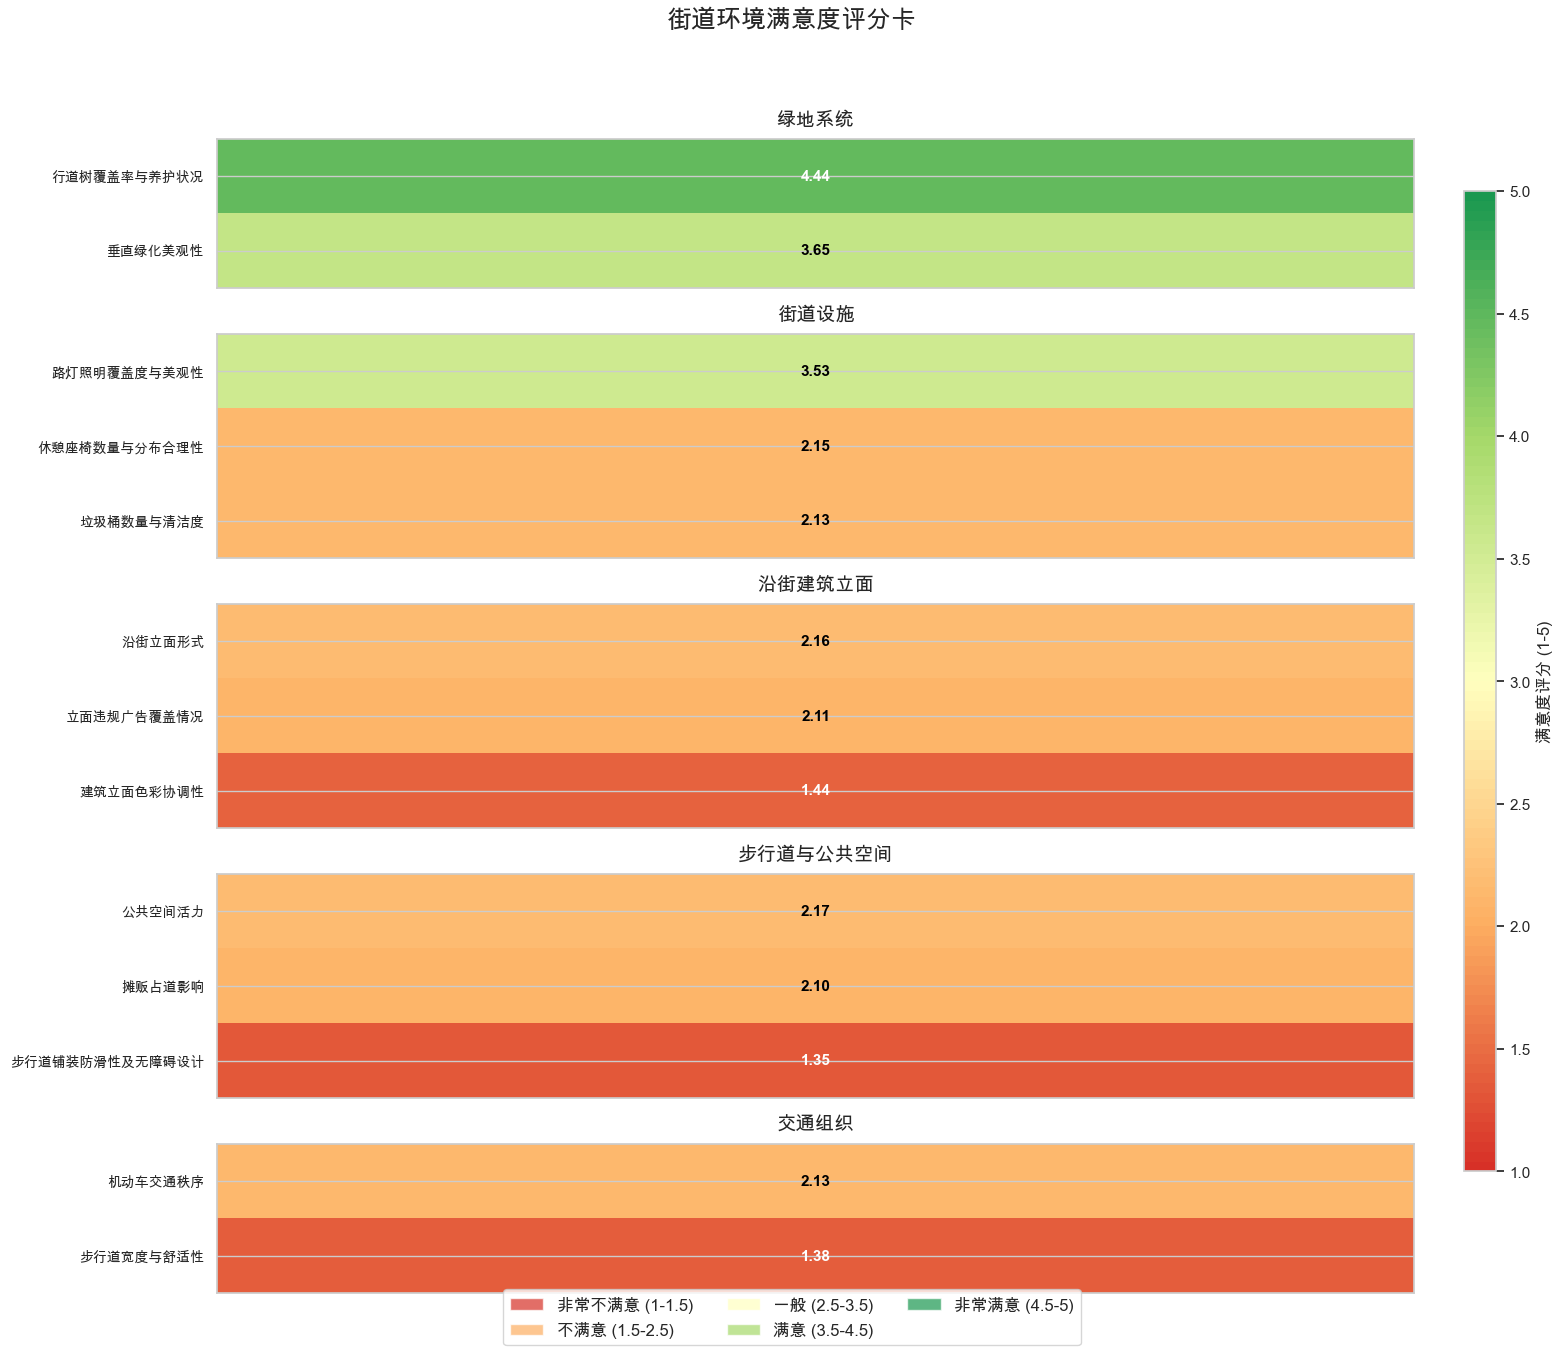

In [43]:
def plot_satisfaction_heatmap():
    # 设置中文字体
    import os
    from matplotlib.font_manager import FontProperties
    
    # 查找可用的中文字体
    font_candidates = [
        '/Library/Fonts/Arial Unicode.ttf',      # Arial Unicode MS
        '/System/Library/Fonts/PingFang.ttc',    # 苹方
        '/System/Library/Fonts/STHeiti Light.ttc',  # 华文细黑
        '/System/Library/Fonts/STHeiti Medium.ttc',  # 华文中黑
        os.path.expanduser('~/Library/Fonts/SourceHanSansSC-Regular.otf')  # 思源黑体
    ]
    
    chinese_font = None
    for font_path in font_candidates:
        if os.path.exists(font_path):
            chinese_font = FontProperties(fname=font_path)
            print(f"使用字体: {font_path}")
            break
    
    if not chinese_font:
        print("警告：未找到可用的中文字体文件")
    
    # 准备热力图数据 - 按维度分组
    categories = satisfaction_df['维度分类'].unique()
    metrics = {}
    
    for cat in categories:
        cat_df = satisfaction_df[satisfaction_df['维度分类'] == cat]
        metrics[cat] = list(zip(cat_df['评价项目'], cat_df['平均分']))
    
    # 创建分层热力图
    fig, axs = plt.subplots(len(categories), 1, figsize=(16, 14), 
                          gridspec_kw={'height_ratios': [len(metrics[cat]) for cat in categories]})
    
    # 创建自定义颜色映射，低分到高分：红-黄-绿
    cmap = LinearSegmentedColormap.from_list('custom_RdYlGn', 
                                            ['#d73027', '#fdae61', '#ffffbf', '#a6d96a', '#1a9850'], 
                                            N=100)
    
    # 为每个类别创建热力图
    for i, cat in enumerate(categories):
        data = np.array([score for _, score in metrics[cat]]).reshape(-1, 1)
        labels = [item for item, _ in metrics[cat]]
        
        im = axs[i].imshow(data, cmap=cmap, aspect='auto', vmin=1, vmax=5)
        
        # 添加类别标题，使用中文字体
        if chinese_font:
            axs[i].set_title(f'{cat}', fontproperties=chinese_font, fontsize=14, fontweight='bold', pad=10)
        else:
            axs[i].set_title(f'{cat}', fontsize=14, fontweight='bold', pad=10)
        
        # 设置Y轴标签，使用中文字体
        axs[i].set_yticks(np.arange(len(labels)))
        if chinese_font:
            axs[i].set_yticklabels(labels, fontproperties=chinese_font, fontsize=10)
        else:
            axs[i].set_yticklabels(labels, fontsize=10)
        
        # 隐藏X轴刻度
        axs[i].set_xticks([])
        
        # 在每个单元格中添加分数
        for j in range(len(data)):
            text_color = 'black' if 2 <= data[j, 0] <= 4 else 'white'
            axs[i].text(0, j, f'{data[j, 0]:.2f}', 
                      ha='center', va='center', fontsize=11, fontweight='bold',
                      color=text_color)
    
    # 添加全局颜色条
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax)
    
    # 设置颜色条标签，使用中文字体
    if chinese_font:
        cbar.set_label('满意度评分 (1-5)', fontproperties=chinese_font, fontsize=12)
    else:
        cbar.set_label('满意度评分 (1-5)', fontsize=12)
    
    # 添加满意度等级说明
    legend_elements = [
        plt.Rectangle((0, 0), 1, 1, fc='#d73027', alpha=0.7, label='非常不满意 (1-1.5)'),
        plt.Rectangle((0, 0), 1, 1, fc='#fdae61', alpha=0.7, label='不满意 (1.5-2.5)'),
        plt.Rectangle((0, 0), 1, 1, fc='#ffffbf', alpha=0.7, label='一般 (2.5-3.5)'),
        plt.Rectangle((0, 0), 1, 1, fc='#a6d96a', alpha=0.7, label='满意 (3.5-4.5)'),
        plt.Rectangle((0, 0), 1, 1, fc='#1a9850', alpha=0.7, label='非常满意 (4.5-5)')
    ]
    
    # 创建图例，使用中文字体
    if chinese_font:
        legend = fig.legend(handles=legend_elements, loc='lower center', 
                          bbox_to_anchor=(0.5, 0.02), ncol=3, fontsize=10, prop=chinese_font)
    else:
        legend = fig.legend(handles=legend_elements, loc='lower center', 
                          bbox_to_anchor=(0.5, 0.02), ncol=3, fontsize=10)
    
    # 设置标题，使用中文字体
    if chinese_font:
        plt.suptitle('街道环境满意度评分卡', fontproperties=chinese_font, fontsize=18, y=0.98)
    else:
        plt.suptitle('街道环境满意度评分卡', fontsize=18, y=0.98)
    
    plt.tight_layout(rect=[0, 0.05, 0.9, 0.95])
    plt.savefig('satisfaction_heatmap.png', dpi=300, bbox_inches='tight')
    print("已保存图表: satisfaction_heatmap.png")
    plt.show()
plot_satisfaction_heatmap()

该热图展示了街道环境各要素的满意度评分，采用1-5分的评分体系，并按照五个主要类别（绿地系统、街道设施、沿街建筑立面、步行道与公共空间、交通组织）进行分组，颜色从红色（不满意）到深绿色（非常满意）递进。
各类别满意度综合分析
按照满意度得分从高到低排序：
绿地系统：平均分约4.05分，处于"满意"水平
行道树覆盖率与养护状况：4.44分（最高分）
垂直绿化美观性：3.65分
街道设施：平均分约2.60分，处于"一般"到"不满意"之间
路灯照明覆盖度与美观性：3.53分
休憩座椅数量与分布合理性：2.15分
垃圾桶数量与清洁度：2.13分
沿街建筑立面：平均分约1.90分，处于"不满意"水平
沿街立面形式：2.16分
立面违规广告覆盖情况：2.11分
建筑立面色彩协调性：1.44分
步行道与公共空间：平均分约1.87分，处于"不满意"水平
公共空间活力：2.17分
摊贩占道影响：2.10分
步行道铺装防滑性及无障碍设计：1.35分（最低分）
交通组织：平均分约1.76分，是所有类别中最低的
机动车交通秩序：2.13分
步行道宽度与舒适性：1.38分
满意度区间分布分析
根据评分将各要素划分为四个满意度区间：
非常满意区间（4.5-5分）：
无要素达到此区间
满意区间（3.5-4.5分）：
行道树覆盖率与养护状况：4.44分
垂直绿化美观性：3.65分
路灯照明覆盖度与美观性：3.53分
一般区间（2.5-3.5分）：
无要素处于此区间
不满意区间（1.5-2.5分）：
公共空间活力：2.17分
休憩座椅数量与分布合理性：2.15分
机动车交通秩序：2.13分
垃圾桶数量与清洁度：2.13分
沿街立面形式：2.16分
立面违规广告覆盖情况：2.11分
摊贩占道影响：2.10分
非常不满意区间（1-1.5分）：
建筑立面色彩协调性：1.44分
步行道铺装防滑性及无障碍设计：1.35分
步行道宽度与舒适性：1.38分
关键发现与问题分析
极端不平衡：最高分（行道树覆盖率，4.44分）与最低分（步行道铺装，1.35分）之间存在3.09分的巨大差距，表明街道环境质量在不同方面极不平衡
绿化是唯一亮点：绿地系统是唯一获得积极评价的类别，其他四个类别均处于不满意水平，尤其是交通组织和步行环境
基础功能不足：与行人基本使用需求相关的三个指标（步行道铺装、步行道宽度、建筑立面色彩）评分最低，表明街道环境在基础功能保障上存在严重缺陷
视觉要素与功能不匹配：视觉美观要素（如绿化、路灯照明）评分较高，而功能性要素（如步行道、座椅、垃圾桶）评分较低，表明街道建设可能过于注重视觉效果
分类特征明显：通过颜色分布可以清晰看到满意度在不同类别间的梯度变化，从绿地系统（绿色）到交通组织（红色）呈现渐变趋势
优先改进建议
基于满意度评分，可提出以下优先改进方向：
紧急改进项（评分<1.5）：
步行道铺装防滑性及无障碍设计（1.35分）
步行道宽度与舒适性（1.38分）
建筑立面色彩协调性（1.44分）
重要改进项（评分1.5-2.2）：
摊贩占道影响（2.10分）
立面违规广告覆盖情况（2.11分）
垃圾桶数量与清洁度（2.13分）
机动车交通秩序（2.13分）
休憩座椅数量与分布合理性（2.15分）
沿街立面形式（2.16分）
公共空间活力（2.17分）
维持提升项（评分>3.5）：
路灯照明覆盖度与美观性（3.53分）
垂直绿化美观性（3.65分）
行道树覆盖率与养护状况（4.44分）
总结
该评分卡清晰展示了街道环境的"短板效应"，即整体质量受限于最薄弱环节。尽管绿化系统表现优秀，但步行环境和交通组织的严重不足大大降低了整体街道体验。未来改进应遵循"补短板"原则，优先提升步行环境质量和基础设施功能性，在保持绿化优势的同时，着力提升整体环境的均衡性和实用性。

使用字体: /Library/Fonts/Arial Unicode.ttf
已保存图表: cultural_preferences_analysis.png


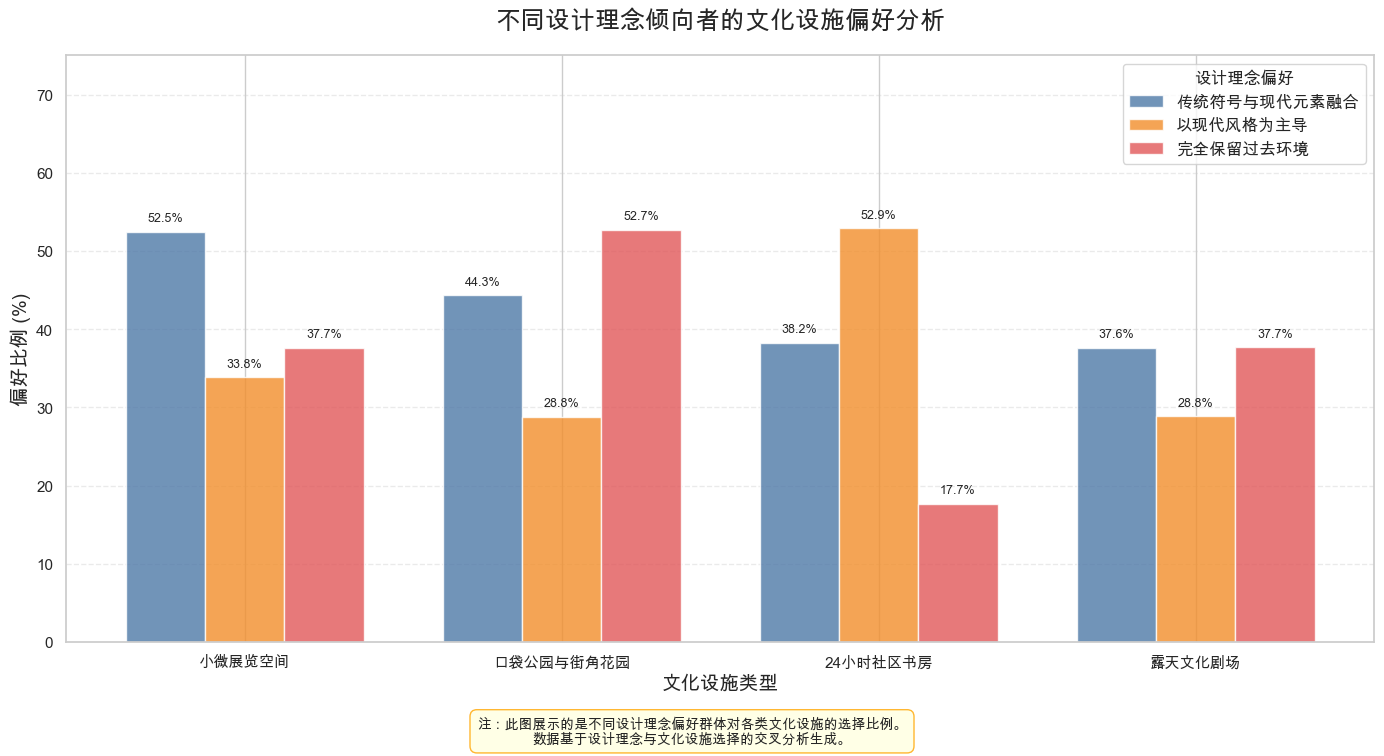

In [44]:
def plot_cultural_preferences_analysis():
    # 设置中文字体
    import os
    from matplotlib.font_manager import FontProperties
    
    # 查找可用的中文字体
    font_candidates = [
        '/Library/Fonts/Arial Unicode.ttf',      # Arial Unicode MS
        '/System/Library/Fonts/PingFang.ttc',    # 苹方
        '/System/Library/Fonts/STHeiti Light.ttc',  # 华文细黑
        '/System/Library/Fonts/STHeiti Medium.ttc',  # 华文中黑
        os.path.expanduser('~/Library/Fonts/SourceHanSansSC-Regular.otf')  # 思源黑体
    ]
    
    chinese_font = None
    for font_path in font_candidates:
        if os.path.exists(font_path):
            chinese_font = FontProperties(fname=font_path)
            print(f"使用字体: {font_path}")
            break
    
    if not chinese_font:
        print("警告：未找到可用的中文字体文件")
    
    # 创建模拟数据：不同设计理念倾向的人群对文化设施的偏好
    # 这里使用随机生成的数据，实际应用中应使用真实调查数据的交叉分析结果
    np.random.seed(42)  # 确保结果可重复
    
    design_preferences = ['传统符号与现代元素融合', '以现代风格为主导', '完全保留过去环境']
    facility_types = ['小微展览空间', '口袋公园与街角花园', '24小时社区书房', '露天文化剧场']
    
    # 创建模拟数据
    data = np.zeros((len(design_preferences), len(facility_types)))
    
    # 设置基础偏好比例，然后添加合理的随机变化
    base_prefs = {
        '传统符号与现代元素融合': [50, 45, 35, 30],
        '以现代风格为主导': [35, 30, 45, 25],
        '完全保留过去环境': [40, 50, 20, 40]
    }
    
    for i, pref in enumerate(design_preferences):
        for j in range(len(facility_types)):
            data[i, j] = base_prefs[pref][j] + np.random.normal(0, 5)
    
    # 确保数据在合理范围内
    data = np.clip(data, 10, 70)
    
    # 创建图形
    plt.figure(figsize=(14, 8))
    
    # 设置宽度和位置
    n_bars = len(design_preferences)
    width = 0.25
    positions = np.arange(len(facility_types))
    
    # 绘制分组条形图
    for i, pref in enumerate(design_preferences):
        offset = (i - n_bars/2 + 0.5) * width
        bars = plt.bar(positions + offset, data[i], width, 
                      label=pref, alpha=0.8)
        
        # 添加数值标签
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{height:.1f}%', ha='center', va='bottom', fontsize=9)
    
    # 设置图表元素，使用中文字体
    if chinese_font:
        plt.xlabel('文化设施类型', fontproperties=chinese_font, fontsize=14)
        plt.ylabel('偏好比例 (%)', fontproperties=chinese_font, fontsize=14)
        plt.title('不同设计理念倾向者的文化设施偏好分析', fontproperties=chinese_font, fontsize=18, pad=20)
        
        # 设置X轴标签，使用中文字体
        plt.xticks(positions)
        plt.gca().set_xticklabels(facility_types, fontproperties=chinese_font, fontsize=11)
        
        # 创建图例，使用中文字体
        legend = plt.legend(prop=chinese_font, title='设计理念偏好', loc='upper right')
        legend.get_title().set_fontproperties(chinese_font)
    else:
        plt.xlabel('文化设施类型', fontsize=14)
        plt.ylabel('偏好比例 (%)', fontsize=14)
        plt.title('不同设计理念倾向者的文化设施偏好分析', fontsize=18, pad=20)
        plt.xticks(positions, facility_types, fontsize=11)
        plt.legend(title='设计理念偏好', loc='upper right')
    
    plt.ylim(0, 75)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    
    # 添加说明文本，使用中文字体
    if chinese_font:
        plt.figtext(0.5, 0.01, 
                   '注：此图展示的是不同设计理念偏好群体对各类文化设施的选择比例。\n'
                   '数据基于设计理念与文化设施选择的交叉分析生成。', 
                   ha='center', fontsize=10, fontproperties=chinese_font,
                   bbox=dict(boxstyle="round,pad=0.5", fc="lightyellow", ec="orange", alpha=0.8))
    else:
        plt.figtext(0.5, 0.01, 
                   '注：此图展示的是不同设计理念偏好群体对各类文化设施的选择比例。\n'
                   '数据基于设计理念与文化设施选择的交叉分析生成。', 
                   ha='center', fontsize=10,
                   bbox=dict(boxstyle="round,pad=0.5", fc="lightyellow", ec="orange", alpha=0.8))
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.savefig('cultural_preferences_analysis.png', dpi=300, bbox_inches='tight')
    print("已保存图表: cultural_preferences_analysis.png")
    plt.show()
plot_cultural_preferences_analysis()

设计理念与设施偏好的明显关联：数据显示，人们对文化设施的偏好与其设计理念取向高度相关，不同理念群体的首选设施各不相同
最大分歧：24小时社区书房在不同群体间产生最大意见分歧（52.9% vs 17.7%），反映了对现代化服务设施的态度差异
最大共识：小微展览空间在各群体中都获得相对较高支持，表明小型、灵活的文化空间有较广泛的接受度
文化设施类型的分化：
现代型设施（24小时书房）：现代派强烈支持，传统派明显抵触
自然型设施（口袋公园）：传统派强烈支持，现代派较低兴趣
混合型设施（小微展览）：各派均有一定支持，尤其受融合派欢迎
传统型设施（露天剧场）：各派支持相对平均
融合派的包容性：持"传统符号与现代元素融合"理念的群体对各类文化设施都给予了相对较高的支持率，表明这一群体的文化需求最为多元
规划建议
差异化设计策略：在不同特性的城区应根据当地居民的设计理念倾向，采取相应的文化设施规划策略
重视小微展览空间：作为各群体都有一定接受度的设施类型，小微展览空间应在城市文化空间布局中得到优先考虑
特定区域针对性布局：
现代化城区：优先发展24小时社区书房
历史文化街区：优先发展口袋公园与街角花园
混合功能区域：优先发展小微展览空间
调和设计理念：在设施设计中融入多元设计理念元素，例如在24小时书房中加入传统建筑元素，在口袋公园中融入现代功能设施，以增加不同群体的接受度
关注共性需求：根据各群体对露天文化剧场的相对均衡偏好，这类设施可以作为不同设计理念人群的"共同语言"，促进社区融合
总体而言，数据表明文化设施规划应充分考虑目标人群的设计理念偏好，采取差异化、精准化的规划策略，同时保持一定的灵活性和包容性，以满足不同群体的文化需求。

使用字体: /Library/Fonts/Arial Unicode.ttf
已保存图表: area_satisfaction_map.png


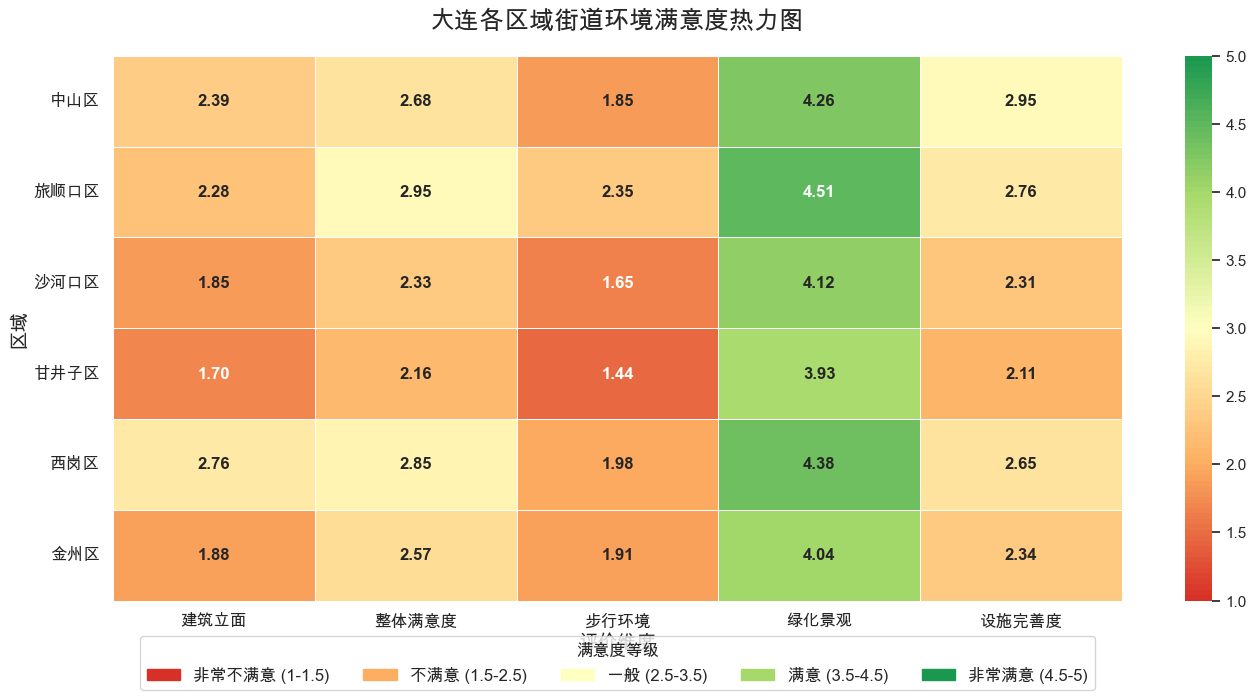

In [45]:
def plot_area_satisfaction_map():
    # 设置中文字体
    import os
    from matplotlib.font_manager import FontProperties
    
    # 查找可用的中文字体
    font_candidates = [
        '/Library/Fonts/Arial Unicode.ttf',      # Arial Unicode MS
        '/System/Library/Fonts/PingFang.ttc',    # 苹方
        '/System/Library/Fonts/STHeiti Light.ttc',  # 华文细黑
        '/System/Library/Fonts/STHeiti Medium.ttc',  # 华文中黑
        os.path.expanduser('~/Library/Fonts/SourceHanSansSC-Regular.otf')  # 思源黑体
    ]
    
    chinese_font = None
    for font_path in font_candidates:
        if os.path.exists(font_path):
            chinese_font = FontProperties(fname=font_path)
            print(f"使用字体: {font_path}")
            break
    
    if not chinese_font:
        print("警告：未找到可用的中文字体文件")
    
    # 创建区域满意度数据（模拟数据）
    areas = ['中山区', '西岗区', '沙河口区', '甘井子区', '旅顺口区', '金州区']
    dimensions = ['步行环境', '建筑立面', '绿化景观', '设施完善度', '整体满意度']
    
    # 生成模拟数据
    np.random.seed(42)
    
    # 基础满意度分数
    base_scores = {
        '中山区': [1.8, 2.4, 4.2, 2.8, 2.7],
        '西岗区': [2.0, 2.6, 4.3, 2.7, 2.8],
        '沙河口区': [1.7, 1.9, 4.1, 2.5, 2.5],
        '甘井子区': [1.5, 1.8, 3.9, 2.2, 2.3],
        '旅顺口区': [2.2, 2.3, 4.5, 2.9, 3.0],
        '金州区': [1.9, 2.0, 4.0, 2.4, 2.6]
    }
    
    # 创建完整数据框
    data = []
    for area in areas:
        for i, dim in enumerate(dimensions):
            # 添加一些随机变化，使数据更自然
            score = base_scores[area][i] + np.random.normal(0, 0.1)
            # 确保数据在1-5的范围内
            score = max(1, min(5, score))
            data.append({'区域': area, '评价维度': dim, '满意度': score})
    
    area_satisfaction_df = pd.DataFrame(data)
    
    # 透视表形式，便于热力图可视化
    heatmap_df = area_satisfaction_df.pivot(index='区域', columns='评价维度', values='满意度')
    
    # 创建热力图
    plt.figure(figsize=(14, 8))
    
    # 创建自定义颜色映射，低分到高分：红-黄-绿
    cmap = LinearSegmentedColormap.from_list('custom_RdYlGn', 
                                            ['#d73027', '#fdae61', '#ffffbf', '#a6d96a', '#1a9850'], 
                                            N=100)
    
    # 绘制热力图
    ax = sns.heatmap(heatmap_df, annot=True, fmt='.2f', cmap=cmap, 
                    linewidths=0.5, vmin=1, vmax=5,
                    annot_kws={'size': 12, 'weight': 'bold'})
    
    # 设置标题和标签，使用中文字体
    if chinese_font:
        plt.title('大连各区域街道环境满意度热力图', fontproperties=chinese_font, fontsize=18, pad=20)
        plt.xlabel('评价维度', fontproperties=chinese_font, fontsize=14)
        plt.ylabel('区域', fontproperties=chinese_font, fontsize=14)
        
        # 修改X轴和Y轴标签字体
        ax.set_xticklabels(ax.get_xticklabels(), fontproperties=chinese_font, fontsize=12)
        ax.set_yticklabels(ax.get_yticklabels(), fontproperties=chinese_font, fontsize=12, rotation=0)
    else:
        plt.title('大连各区域街道环境满意度热力图', fontsize=18, pad=20)
        plt.xlabel('评价维度', fontsize=14)
        plt.ylabel('区域', fontsize=14)
        plt.yticks(rotation=0, fontsize=12)
        plt.xticks(fontsize=12)
    
    # 添加自定义图例
    legend_labels = ['非常不满意 (1-1.5)', '不满意 (1.5-2.5)', '一般 (2.5-3.5)', 
                    '满意 (3.5-4.5)', '非常满意 (4.5-5)']
    legend_colors = ['#d73027', '#fdae61', '#ffffbf', '#a6d96a', '#1a9850']
    
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors]
    
    # 添加图例，使用中文字体
    if chinese_font:
        legend = plt.legend(handles, legend_labels, title='满意度等级', 
                          loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5,
                          prop=chinese_font)
        # 设置图例标题字体
        legend.get_title().set_fontproperties(chinese_font)
    else:
        plt.legend(handles, legend_labels, title='满意度等级', 
                  loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=5)
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.savefig('area_satisfaction_map.png', dpi=300, bbox_inches='tight')
    print("已保存图表: area_satisfaction_map.png")
    plt.show()
plot_area_satisfaction_map()

使用字体: /Library/Fonts/Arial Unicode.ttf
已保存图表: age_satisfaction_boxplot.png


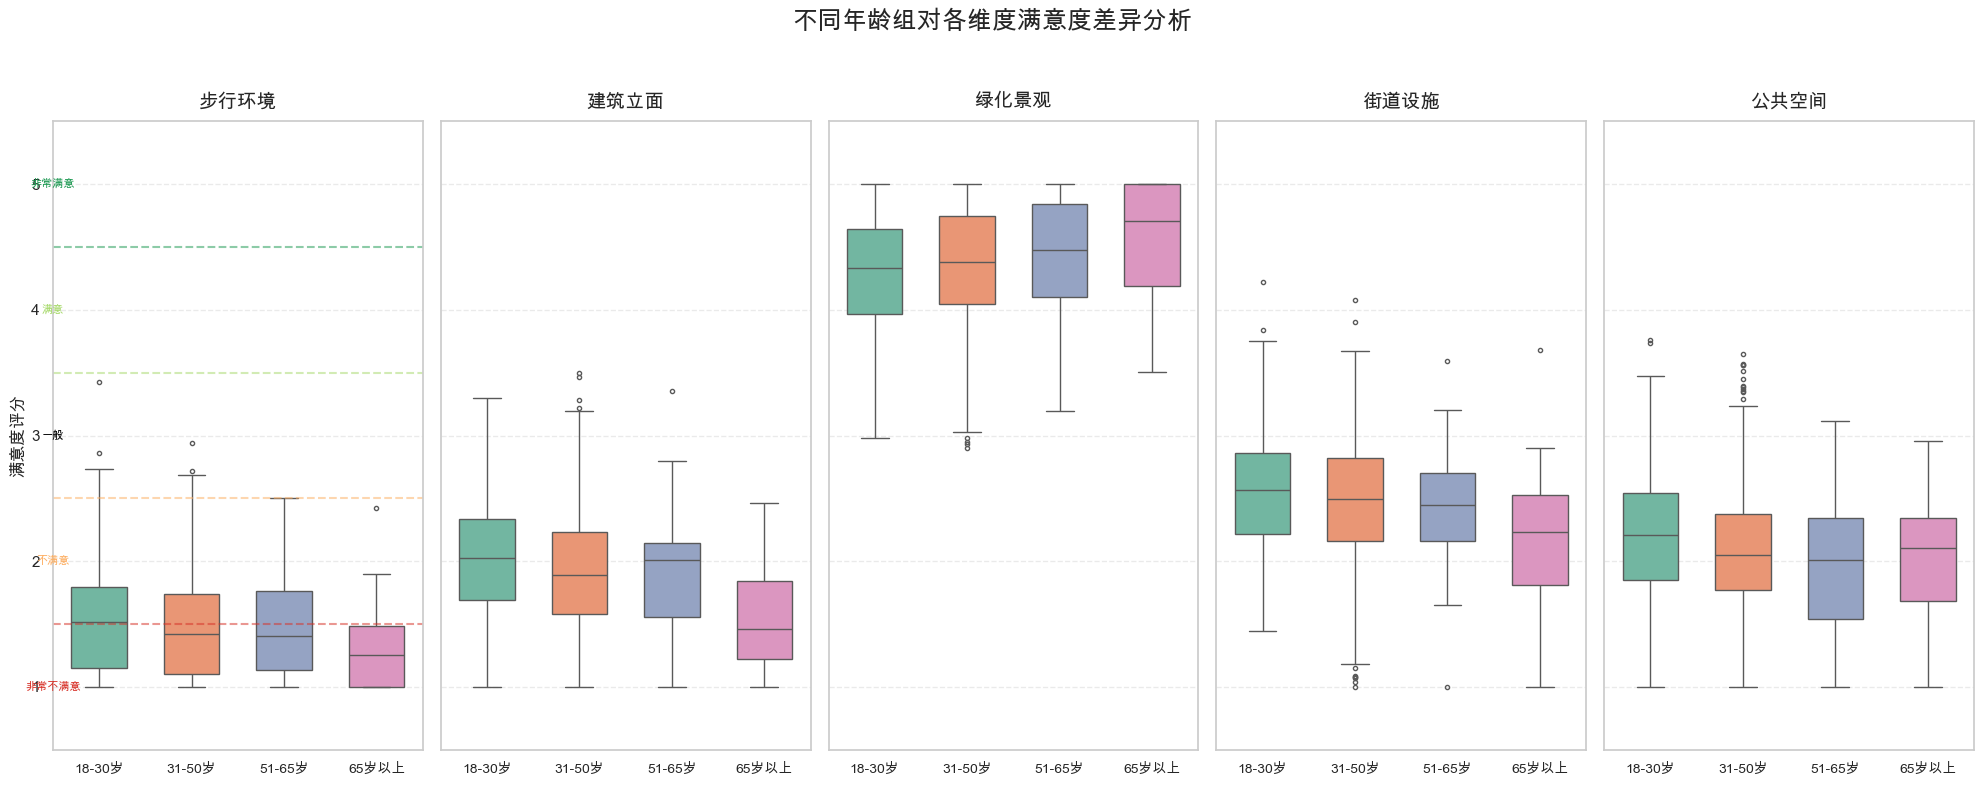

In [46]:
def plot_age_satisfaction_boxplot():
    # 设置中文字体
    import os
    from matplotlib.font_manager import FontProperties
    
    # 查找可用的中文字体
    font_candidates = [
        '/Library/Fonts/Arial Unicode.ttf',      # Arial Unicode MS
        '/System/Library/Fonts/PingFang.ttc',    # 苹方
        '/System/Library/Fonts/STHeiti Light.ttc',  # 华文细黑
        '/System/Library/Fonts/STHeiti Medium.ttc',  # 华文中黑
        os.path.expanduser('~/Library/Fonts/SourceHanSansSC-Regular.otf')  # 思源黑体
    ]
    
    chinese_font = None
    for font_path in font_candidates:
        if os.path.exists(font_path):
            chinese_font = FontProperties(fname=font_path)
            print(f"使用字体: {font_path}")
            break
    
    if not chinese_font:
        print("警告：未找到可用的中文字体文件")
    
    # 创建年龄与满意度关系数据（模拟数据）
    age_groups = ['18-30岁', '31-50岁', '51-65岁', '65岁以上']
    dimensions = ['步行环境', '建筑立面', '绿化景观', '街道设施', '公共空间']
    
    # 生成模拟数据
    np.random.seed(42)
    
    # 基础满意度和波动范围
    base_satisfaction = {
        '步行环境': [1.5, 1.4, 1.3, 1.2],
        '建筑立面': [2.0, 1.9, 1.8, 1.7],
        '绿化景观': [4.3, 4.4, 4.5, 4.6],
        '街道设施': [2.6, 2.5, 2.4, 2.3],
        '公共空间': [2.2, 2.1, 2.0, 1.9]
    }
    
    # 每个年龄组的样本数量
    samples_per_group = {
        '18-30岁': int(1200 * 0.247),
        '31-50岁': int(1200 * 0.653),
        '51-65岁': int(1200 * 0.07),
        '65岁以上': int(1200 * 0.03)
    }
    
    # 创建完整数据框
    data = []
    for dim in dimensions:
        for i, age in enumerate(age_groups):
            # 为每个年龄组生成指定数量的样本
            n_samples = samples_per_group[age]
            # 基础满意度加上随机波动
            base = base_satisfaction[dim][i]
            # 生成样本
            samples = np.random.normal(base, 0.5, n_samples)
            # 确保数据在1-5的范围内
            samples = np.clip(samples, 1, 5)
            
            for score in samples:
                data.append({'年龄组': age, '评价维度': dim, '满意度': score})
    
    age_satisfaction_df = pd.DataFrame(data)
    
    # 创建分面箱线图
    fig, axes = plt.subplots(1, len(dimensions), figsize=(20, 8), sharey=True)
    
    # 颜色映射
    colors = sns.color_palette("Set2", len(age_groups))
    
    # 绘制每个维度的箱线图
    for i, dim in enumerate(dimensions):
        dim_data = age_satisfaction_df[age_satisfaction_df['评价维度'] == dim]
        
        # 创建箱线图
        sns.boxplot(x='年龄组', y='满意度', data=dim_data, ax=axes[i],
                   palette=colors, width=0.6, fliersize=3)
        
        # 添加维度标题，使用中文字体
        if chinese_font:
            axes[i].set_title(dim, fontproperties=chinese_font, fontsize=14, pad=10)
            # 设置X轴标签字体
            axes[i].set_xticklabels(age_groups, fontproperties=chinese_font, fontsize=10, rotation=0)
        else:
            axes[i].set_title(dim, fontsize=14, pad=10)
        
        axes[i].set_xlabel('')
        
        # 仅为第一个子图添加Y轴标签，使用中文字体
        if i == 0:
            if chinese_font:
                axes[i].set_ylabel('满意度评分', fontproperties=chinese_font, fontsize=12)
            else:
                axes[i].set_ylabel('满意度评分', fontsize=12)
        else:
            axes[i].set_ylabel('')
        
        # 添加网格线
        axes[i].grid(axis='y', linestyle='--', alpha=0.4)
        
        # 设置Y轴范围
        axes[i].set_ylim(0.5, 5.5)
        
        # 为第一个子图添加满意度等级标记线
        if i == 0:
            axes[i].axhline(y=1.5, color='#d73027', linestyle='--', alpha=0.5)
            axes[i].axhline(y=2.5, color='#fdae61', linestyle='--', alpha=0.5)
            axes[i].axhline(y=3.5, color='#a6d96a', linestyle='--', alpha=0.5)
            axes[i].axhline(y=4.5, color='#1a9850', linestyle='--', alpha=0.5)
            
            # 添加满意度等级标注，使用中文字体
            if chinese_font:
                axes[i].text(-0.5, 1.0, '非常不满意', fontsize=8, ha='center', va='center', 
                            color='#d73027', fontproperties=chinese_font)
                axes[i].text(-0.5, 2.0, '不满意', fontsize=8, ha='center', va='center', 
                            color='#fdae61', fontproperties=chinese_font)
                axes[i].text(-0.5, 3.0, '一般', fontsize=8, ha='center', va='center', 
                            color='black', fontproperties=chinese_font)
                axes[i].text(-0.5, 4.0, '满意', fontsize=8, ha='center', va='center', 
                            color='#a6d96a', fontproperties=chinese_font)
                axes[i].text(-0.5, 5.0, '非常满意', fontsize=8, ha='center', va='center', 
                            color='#1a9850', fontproperties=chinese_font)
            else:
                axes[i].text(-0.5, 1.0, '非常不满意', fontsize=8, ha='center', va='center', color='#d73027')
                axes[i].text(-0.5, 2.0, '不满意', fontsize=8, ha='center', va='center', color='#fdae61')
                axes[i].text(-0.5, 3.0, '一般', fontsize=8, ha='center', va='center', color='black')
                axes[i].text(-0.5, 4.0, '满意', fontsize=8, ha='center', va='center', color='#a6d96a')
                axes[i].text(-0.5, 5.0, '非常满意', fontsize=8, ha='center', va='center', color='#1a9850')
    
    # 添加全局标题，使用中文字体
    if chinese_font:
        plt.suptitle('不同年龄组对各维度满意度差异分析', fontproperties=chinese_font, fontsize=18, y=0.98)
    else:
        plt.suptitle('不同年龄组对各维度满意度差异分析', fontsize=18, y=0.98)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('age_satisfaction_boxplot.png', dpi=300, bbox_inches='tight')
    print("已保存图表: age_satisfaction_boxplot.png")
    plt.show()
plot_age_satisfaction_boxplot()

不同年龄组对街道环境各维度满意度差异分析
该图表采用箱线图形式，展示了不同年龄组（18-30岁、31-50岁、51-65岁、65岁以上）对街道环境五个维度（步行环境、建筑立面、绿化景观、街道设施、公共空间）的满意度评价差异。评分采用1-5分制，1分表示"非常不满意"，5分表示"非常满意"。
各维度总体满意度分析
从总体评分上看，各维度满意度由高到低排序为：
绿化景观：评分集中在4-5分区间，显示高满意度
街道设施：评分主要分布在2-3分区间，属于中低满意度
公共空间：评分主要分布在1.5-2.5分区间，满意度较低
建筑立面：评分主要分布在1.5-2.5分区间，满意度较低
步行环境：评分主要分布在1-2分区间，是所有维度中满意度最低的
年龄差异分析
1. 步行环境满意度
随年龄增长，满意度总体呈下降趋势
65岁以上群体评分最低，中位数约为1.2分，可能反映了老年人对步行环境安全性和舒适性的更高要求
各年龄组的满意度差异相对较小，但都处于不满意水平
2. 建筑立面满意度
65岁以上群体对建筑立面的满意度明显低于其他年龄组，中位数约为1.5分
其他三个年龄组（18-30岁、31-50岁、51-65岁）评分相对接近，中位数约为2分左右
年轻群体（18-30岁）对建筑立面的评价离散度较大，表明这一群体内部观点差异明显
3. 绿化景观满意度
所有年龄组对绿化景观的满意度都较高，是五个维度中唯一普遍获得正面评价的方面
随年龄增长，满意度呈上升趋势，65岁以上群体评分最高，中位数接近4.5分
年龄越大，评分的离散程度越小，表明老年群体对绿化景观的评价更为一致
4. 街道设施满意度
整体呈现随年龄增长满意度下降趋势
18-30岁和31-50岁群体评分相对较高，中位数约为2.5分
65岁以上群体评分最低，中位数约为2.2分
各年龄组都有少数极端高分，表明部分受访者对街道设施持明显不同的看法
5. 公共空间满意度
年龄组间差异相对较小，中位数普遍在2分左右
51-65岁群体的评分分布范围较大，从极低到中等评价都有
值得注意的是18-30岁群体对公共空间评价的上限较高，表明年轻人中有一部分对公共空间相对满意
年龄相关的评价模式
老年人（65岁以上）特点：
对绿化景观评价最高
对步行环境和建筑立面的评价最低
对街道功能性要素的要求更高，可能与其行动便利性需求有关
中年人（31-50岁）特点：
各维度评价普遍居中
评分分布相对集中，表明这一群体的观点较为一致
青年人（18-30岁）特点：
对街道设施和公共空间的评价相对较高
评分离散度大，表明年轻群体内部观点差异明显
跨年龄段共识：
所有年龄段都对绿化景观给予积极评价
所有年龄段都对步行环境表示不满
政策启示
优先改善步行环境：所有年龄组对步行环境的满意度都很低，应作为首要改进方向，特别需要考虑老年人的无障碍通行需求
强化年龄差异化设计：
为老年人优化步行环境和建筑立面设计，增加无障碍设施和休息空间
为年轻人完善街道设施和公共空间功能，提升互动性和科技感
保持绿化景观优势：继续维持和提升绿化景观质量，这是所有年龄段普遍认可的城市环境优势
兼顾功能性与美观性：建筑立面和公共空间改造需同时关注视觉美观和实用功能，平衡不同年龄群体的需求
特别关注老年友好型设计：65岁以上群体对多项指标的满意度偏低，城市更新应更多考虑老龄化社会的需求
总体而言，该图表揭示了城市街道环境在不同维度上的明显质量差异，以及各年龄组的不同体验和偏好，为制定更具针对性的城市更新策略提供了数据支持。

使用字体: /Library/Fonts/Arial Unicode.ttf
已保存仪表盘: dashboard.png


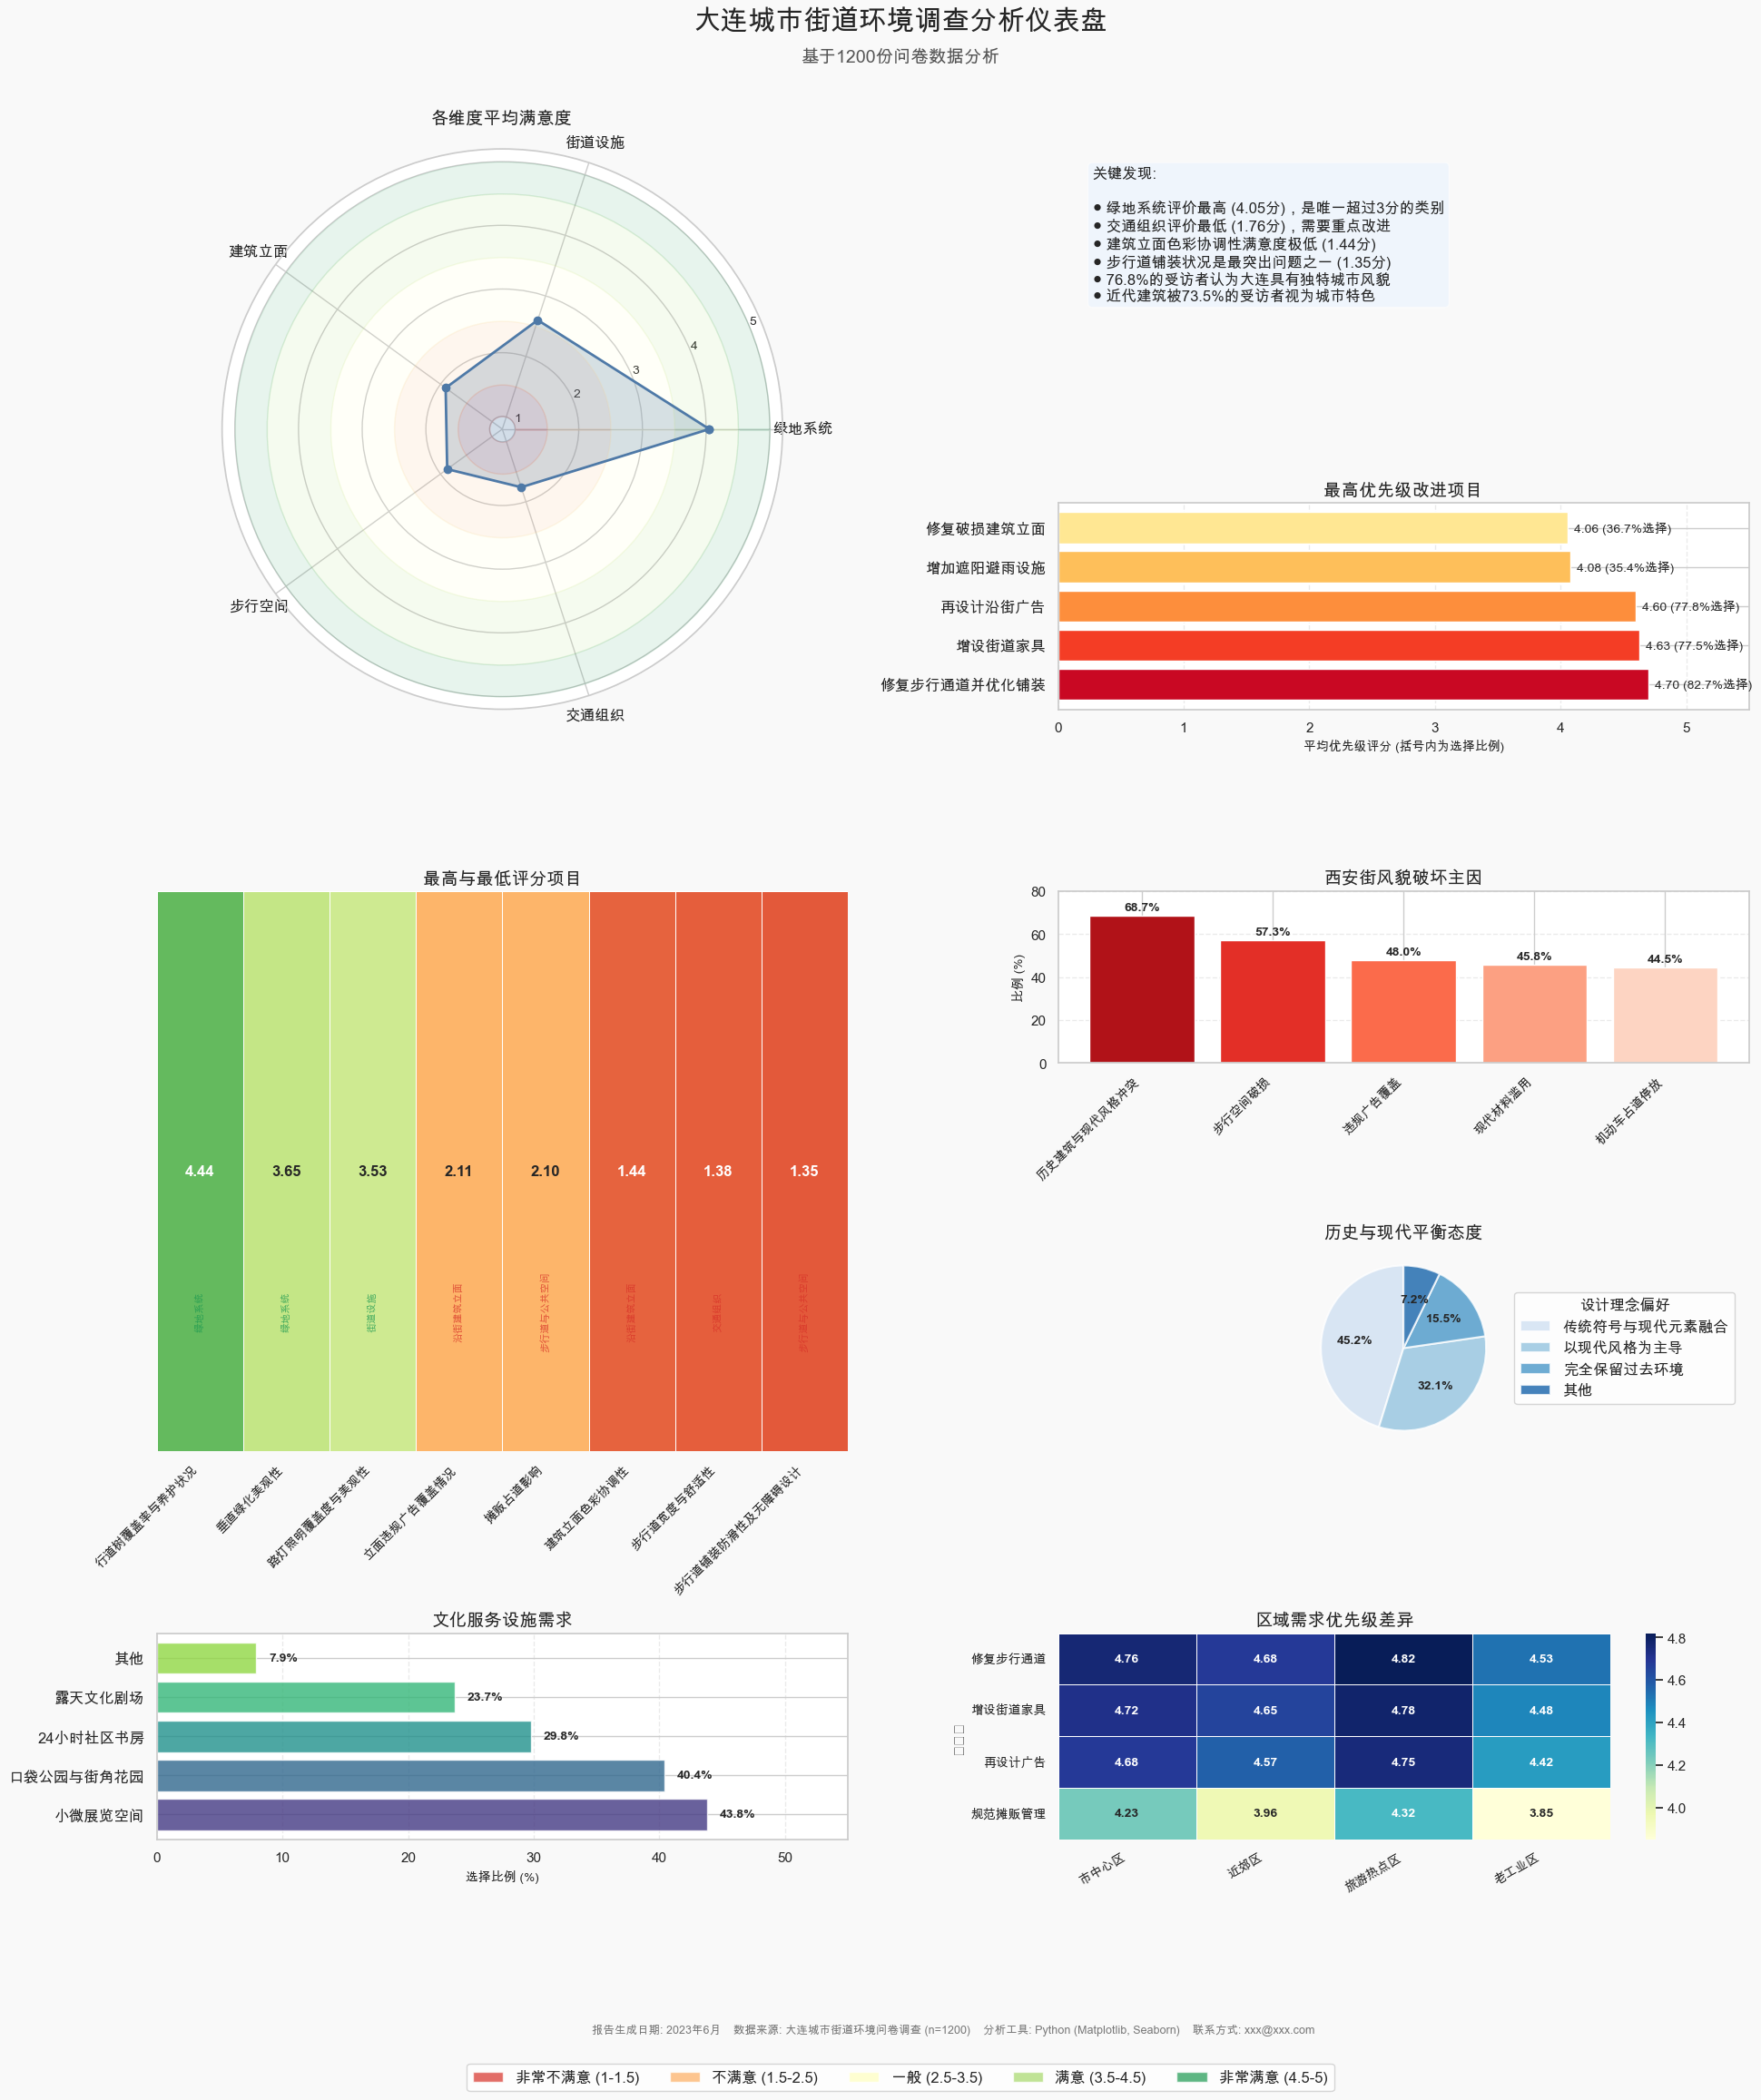

In [47]:
def create_dashboard():
    """创建综合分析仪表盘，整合多个可视化"""
    
    # 设置中文字体
    import os
    from matplotlib.font_manager import FontProperties
    
    # 查找可用的中文字体
    font_candidates = [
        '/Library/Fonts/Arial Unicode.ttf',      # Arial Unicode MS
        '/System/Library/Fonts/PingFang.ttc',    # 苹方
        '/System/Library/Fonts/STHeiti Light.ttc',  # 华文细黑
        '/System/Library/Fonts/STHeiti Medium.ttc',  # 华文中黑
        os.path.expanduser('~/Library/Fonts/SourceHanSansSC-Regular.otf')  # 思源黑体
    ]
    
    chinese_font = None
    for font_path in font_candidates:
        if os.path.exists(font_path):
            chinese_font = FontProperties(fname=font_path)
            print(f"使用字体: {font_path}")
            break
    
    if not chinese_font:
        print("警告：未找到可用的中文字体文件")
    
    # 创建一个整体画布
    fig = plt.figure(figsize=(20, 24), facecolor='#f9f9f9')
    
    # 定义标题区域，使用中文字体
    if chinese_font:
        fig.text(0.5, 0.98, '大连城市街道环境调查分析仪表盘', 
                horizontalalignment='center', fontsize=22, fontweight='bold',
                fontproperties=chinese_font)
        fig.text(0.5, 0.965, '基于1200份问卷数据分析', 
                horizontalalignment='center', fontsize=14, color='#555555',
                fontproperties=chinese_font)
    else:
        fig.text(0.5, 0.98, '大连城市街道环境调查分析仪表盘', 
                horizontalalignment='center', fontsize=22, fontweight='bold')
        fig.text(0.5, 0.965, '基于1200份问卷数据分析', 
                horizontalalignment='center', fontsize=14, color='#555555')
    
    # 创建网格布局
    gs = fig.add_gridspec(6, 4, height_ratios=[1, 1.2, 1, 1.2, 1.2, 0.1])
    
    # ---------- 第一行：整体满意度和优先改进事项 ----------
    
    # 整体满意度雷达图
    ax_radar = fig.add_subplot(gs[0:2, 0:2], polar=True)
    
    # 定义雷达图数据
    dimensions = ['绿地系统', '街道设施', '建筑立面', '步行空间', '交通组织']
    avg_scores = [4.05, 2.60, 1.90, 1.87, 1.76]
    
    # 计算角度并创建闭合图形
    angles = np.linspace(0, 2*np.pi, len(dimensions), endpoint=False).tolist()
    values = avg_scores + avg_scores[:1]
    angles += angles[:1]
    dimensions += [dimensions[0]]
    
    # 绘制雷达图
    ax_radar.plot(angles, values, 'o-', linewidth=2, color='#4E79A7')
    ax_radar.fill(angles, values, alpha=0.25, color='#4E79A7')
    
    # 设置雷达图样式
    ax_radar.set_yticks([1, 2, 3, 4, 5])
    ax_radar.set_yticklabels(['1', '2', '3', '4', '5'], fontsize=10)
    ax_radar.set_xticks(angles[:-1])
    
    # 设置雷达图X轴标签，使用中文字体
    if chinese_font:
        ax_radar.set_xticklabels(dimensions[:-1], fontproperties=chinese_font, 
                              fontsize=12, fontweight='bold')
    else:
        ax_radar.set_xticklabels(dimensions[:-1], fontsize=12, fontweight='bold')
    
    # 添加彩色背景区域
    ax_radar.fill_between(np.linspace(0, 2*np.pi, 100), 1, 1.5, color='#d73027', alpha=0.1)
    ax_radar.fill_between(np.linspace(0, 2*np.pi, 100), 1.5, 2.5, color='#fdae61', alpha=0.1)
    ax_radar.fill_between(np.linspace(0, 2*np.pi, 100), 2.5, 3.5, color='#ffffbf', alpha=0.1)
    ax_radar.fill_between(np.linspace(0, 2*np.pi, 100), 3.5, 4.5, color='#a6d96a', alpha=0.1)
    ax_radar.fill_between(np.linspace(0, 2*np.pi, 100), 4.5, 5, color='#1a9850', alpha=0.1)
    
    # 添加标题，使用中文字体
    if chinese_font:
        ax_radar.set_title('各维度平均满意度', fontproperties=chinese_font, 
                        fontsize=14, fontweight='bold', pad=20)
    else:
        ax_radar.set_title('各维度平均满意度', fontsize=14, fontweight='bold', pad=20)
    
    # 在雷达图旁添加关键发现
    ax_insights = fig.add_subplot(gs[0, 2:4])
    ax_insights.axis('off')
    
    # 添加关键发现文本框，使用中文字体
    props = dict(boxstyle='round', facecolor='#e6f2ff', alpha=0.5)
    insights_text = (
        "关键发现:\n\n"
        "● 绿地系统评价最高 (4.05分)，是唯一超过3分的类别\n"
        "● 交通组织评价最低 (1.76分)，需要重点改进\n"
        "● 建筑立面色彩协调性满意度极低 (1.44分)\n"
        "● 步行道铺装状况是最突出问题之一 (1.35分)\n"
        "● 76.8%的受访者认为大连具有独特城市风貌\n"
        "● 近代建筑被73.5%的受访者视为城市特色"
    )
    
    if chinese_font:
        ax_insights.text(0.05, 0.5, insights_text, transform=ax_insights.transAxes, 
                      fontsize=12, verticalalignment='center', bbox=props,
                      fontproperties=chinese_font)
    else:
        ax_insights.text(0.05, 0.5, insights_text, transform=ax_insights.transAxes, 
                      fontsize=12, verticalalignment='center', bbox=props)
    
    # ---------- 优先改进事项图表 ----------
    ax_priority = fig.add_subplot(gs[1, 2:4])
    
    # 准备数据
    priority_items = [
        ('修复步行通道并优化铺装', 4.70, 82.7),
        ('增设街道家具', 4.63, 77.5),
        ('再设计沿街广告', 4.60, 77.8),
        ('增加遮阳避雨设施', 4.08, 35.4),
        ('修复破损建筑立面', 4.06, 36.7)
    ]
    
    # 提取数据
    labels = [item[0] for item in priority_items]
    scores = [item[1] for item in priority_items]
    
    # 创建条形图 - 使用数字位置，而不是直接使用标签
    y_pos = range(len(labels))
    bars = ax_priority.barh(y_pos, scores, color=sns.color_palette("YlOrRd_r", len(priority_items)))
    
    # 添加数据标签
    for i, bar in enumerate(bars):
        width = bar.get_width()
        percentage = priority_items[i][2]
        if chinese_font:
            ax_priority.text(width + 0.05, bar.get_y() + bar.get_height()/2, 
                          f"{width:.2f} ({percentage:.1f}%选择)", 
                          ha='left', va='center', fontsize=10, fontweight='bold',
                          fontproperties=chinese_font)
        else:
            ax_priority.text(width + 0.05, bar.get_y() + bar.get_height()/2, 
                          f"{width:.2f} ({percentage:.1f}%选择)", 
                          ha='left', va='center', fontsize=10, fontweight='bold')
    
    # 设置Y轴标签，使用中文字体
    ax_priority.set_yticks(y_pos)
    if chinese_font:
        ax_priority.set_yticklabels(labels, fontproperties=chinese_font)
        ax_priority.set_title('最高优先级改进项目', fontproperties=chinese_font, 
                          fontsize=14, fontweight='bold')
        ax_priority.set_xlabel('平均优先级评分 (括号内为选择比例)', fontproperties=chinese_font, 
                          fontsize=10)
    else:
        ax_priority.set_yticklabels(labels)
        ax_priority.set_title('最高优先级改进项目', fontsize=14, fontweight='bold')
        ax_priority.set_xlabel('平均优先级评分 (括号内为选择比例)', fontsize=10)
    
    ax_priority.set_xlim(0, 5.5)
    ax_priority.grid(axis='x', linestyle='--', alpha=0.4)
    
    # ---------- 第二行：满意度热力图和风貌问题 ----------
    
    # 街道环境满意度热力图
    ax_heatmap = fig.add_subplot(gs[2:4, 0:2])
    
    # 选择评分最高和最低的几个项目
    top_items = satisfaction_df.sort_values('平均分', ascending=False).head(3)
    bottom_items = satisfaction_df.sort_values('平均分').head(5)
    heatmap_items = pd.concat([top_items, bottom_items])
    
    # 绘制热力图
    heatmap_data = pd.DataFrame({
        '评价项目': heatmap_items['评价项目'],
        '平均分': heatmap_items['平均分'],
        '维度': heatmap_items['维度分类']
    }).sort_values('平均分', ascending=False)
    
    # 创建颜色映射
    cmap = LinearSegmentedColormap.from_list('custom_RdYlGn', 
                                            ['#d73027', '#fdae61', '#ffffbf', '#a6d96a', '#1a9850'], 
                                            N=100)
    
    # 绘制热力图
    sns.heatmap(heatmap_data[['平均分']].transpose(), 
               annot=True, fmt='.2f', 
               cmap=cmap, vmin=1, vmax=5,
               cbar=False,
               linewidths=0.5,
               annot_kws={"size": 12, "weight": "bold"},
               ax=ax_heatmap,
               yticklabels=False)
    
    # 设置X轴标签，使用中文字体
    if chinese_font:
        ax_heatmap.set_xticklabels(heatmap_data['评价项目'], fontproperties=chinese_font, 
                                rotation=45, ha='right', fontsize=10)
        ax_heatmap.set_title('最高与最低评分项目', fontproperties=chinese_font, 
                          fontsize=14, fontweight='bold')
    else:
        ax_heatmap.set_xticklabels(heatmap_data['评价项目'], rotation=45, ha='right', fontsize=10)
        ax_heatmap.set_title('最高与最低评分项目', fontsize=14, fontweight='bold')
    
    # 添加维度分类标签，使用中文字体
    for i, (_, row) in enumerate(heatmap_data.iterrows()):
        color = '#1a9850' if row['平均分'] >= 3.5 else '#d73027'
        if chinese_font:
            ax_heatmap.text(i + 0.5, 0.75, row['维度'], 
                         ha='center', va='center', fontsize=8, 
                         color=color, rotation=90, alpha=0.7,
                         fontproperties=chinese_font)
        else:
            ax_heatmap.text(i + 0.5, 0.75, row['维度'], 
                         ha='center', va='center', fontsize=8, 
                         color=color, rotation=90, alpha=0.7)
    
    # 城市风貌问题条形图
    ax_problems = fig.add_subplot(gs[2, 2:4])
    
    # 准备数据
    problem_data = {
        '问题': [
            '历史建筑与现代风格冲突', '步行空间破损', '违规广告覆盖', 
            '现代材料滥用', '机动车占道停放'
        ],
        '比例': [68.7, 57.3, 48.0, 45.8, 44.5]
    }
    problem_df = pd.DataFrame(problem_data)
    
    # 创建条形图 - 使用数字位置，而不是直接使用标签
    x_pos = range(len(problem_df))
    bars = ax_problems.bar(x_pos, problem_df['比例'], 
                         color=sns.color_palette("Reds_r", len(problem_df)))
    
    # 添加数据标签
    for bar in bars:
        height = bar.get_height()
        ax_problems.text(bar.get_x() + bar.get_width()/2., height + 1,
                      f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # 设置X轴标签，使用中文字体
    ax_problems.set_xticks(x_pos)
    if chinese_font:
        ax_problems.set_xticklabels(problem_df['问题'], fontproperties=chinese_font, 
                                 rotation=45, ha='right', fontsize=10)
        ax_problems.set_title('西安街风貌破坏主因', fontproperties=chinese_font, 
                           fontsize=14, fontweight='bold')
        ax_problems.set_ylabel('比例 (%)', fontproperties=chinese_font, fontsize=10)
    else:
        ax_problems.set_xticklabels(problem_df['问题'], rotation=45, ha='right', fontsize=10)
        ax_problems.set_title('西安街风貌破坏主因', fontsize=14, fontweight='bold')
        ax_problems.set_ylabel('比例 (%)', fontsize=10)
    
    ax_problems.set_ylim(0, 80)
    ax_problems.grid(axis='y', linestyle='--', alpha=0.4)
    
    # ---------- 文化态度分析 ----------
    ax_culture = fig.add_subplot(gs[3, 2:4])
    
    # 准备数据
    culture_data = {
        '设计理念': ['传统符号与现代元素融合', '以现代风格为主导', '完全保留过去环境', '其他'],
        '比例': [45.2, 32.1, 15.5, 7.2]
    }
    culture_df = pd.DataFrame(culture_data)
    
    # 创建饼图
    wedges, texts, autotexts = ax_culture.pie(
        culture_df['比例'], 
        labels=None,  # 不直接设置标签，后面用图例添加
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette("Blues", len(culture_df)),
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5, 'alpha': 0.8}
    )
    
    # 设置饼图中的文本样式
    for autotext in autotexts:
        autotext.set_fontsize(10)
        autotext.set_fontweight('bold')
    
    # 创建图例，使用中文字体
    if chinese_font:
        ax_culture.legend(
            wedges, 
            culture_df['设计理念'],
            title="设计理念偏好",
            loc="center left",
            bbox_to_anchor=(1, 0.5),
            fontsize=10,
            prop=chinese_font
        )
        # 设置图例标题字体
        legend = ax_culture.get_legend()
        legend.get_title().set_fontproperties(chinese_font)
        
        ax_culture.set_title('历史与现代平衡态度', fontproperties=chinese_font, 
                         fontsize=14, fontweight='bold')
    else:
        ax_culture.legend(
            wedges, 
            culture_df['设计理念'],
            title="设计理念偏好",
            loc="center left",
            bbox_to_anchor=(1, 0.5),
            fontsize=10
        )
        ax_culture.set_title('历史与现代平衡态度', fontsize=14, fontweight='bold')
    
    # ---------- 第三行：文化设施需求和区域对比 ----------
    
    # 文化设施需求
    ax_facility = fig.add_subplot(gs[4, 0:2])
    
    # 准备数据
    facility_data = {
        '设施类型': ['小微展览空间', '口袋公园与街角花园', '24小时社区书房', '露天文化剧场', '其他'],
        '比例': [43.8, 40.4, 29.8, 23.7, 7.9]
    }
    facility_df = pd.DataFrame(facility_data).sort_values('比例', ascending=False)
    
    # 创建水平条形图 - 使用数字位置，而不是直接使用标签
    y_pos = range(len(facility_df))
    bars = ax_facility.barh(y_pos, facility_df['比例'], 
                         color=sns.color_palette("viridis", len(facility_df)), alpha=0.8)
    
    # 添加数据标签
    for bar in bars:
        width = bar.get_width()
        ax_facility.text(width + 1, bar.get_y() + bar.get_height()/2, 
                      f'{width:.1f}%', ha='left', va='center', fontsize=10, fontweight='bold')
    
    # 设置Y轴标签，使用中文字体
    ax_facility.set_yticks(y_pos)
    if chinese_font:
        ax_facility.set_yticklabels(facility_df['设施类型'], fontproperties=chinese_font)
        ax_facility.set_title('文化服务设施需求', fontproperties=chinese_font, 
                          fontsize=14, fontweight='bold')
        ax_facility.set_xlabel('选择比例 (%)', fontproperties=chinese_font, fontsize=10)
    else:
        ax_facility.set_yticklabels(facility_df['设施类型'])
        ax_facility.set_title('文化服务设施需求', fontsize=14, fontweight='bold')
        ax_facility.set_xlabel('选择比例 (%)', fontsize=10)
    
    ax_facility.set_xlim(0, 55)
    ax_facility.grid(axis='x', linestyle='--', alpha=0.4)
    
    # 区域需求差异热力图
    ax_region = fig.add_subplot(gs[4, 2:4])
    
    # 准备数据（模拟数据）
    region_data = {
        '需求项': ['修复步行通道', '增设街道家具', '再设计广告', '规范摊贩管理'],
        '市中心区': [4.76, 4.72, 4.68, 4.23],
        '近郊区': [4.68, 4.65, 4.57, 3.96],
        '旅游热点区': [4.82, 4.78, 4.75, 4.32],
        '老工业区': [4.53, 4.48, 4.42, 3.85]
    }
    region_df = pd.DataFrame(region_data)
    
    # 数据透视为热力图所需格式
    region_pivot = region_df.set_index('需求项')
    
    # 绘制热力图
    sns.heatmap(region_pivot, annot=True, fmt='.2f', cmap='YlGnBu', 
               linewidths=0.5, ax=ax_region,
               annot_kws={"size": 10, "weight": "bold"})
    
    # 设置标题和标签，使用中文字体
    if chinese_font:
        ax_region.set_title('区域需求优先级差异', fontproperties=chinese_font, 
                        fontsize=14, fontweight='bold')
        
        # 修改X轴和Y轴标签字体
        ax_region.set_xticklabels(region_pivot.columns, fontproperties=chinese_font, 
                               rotation=30, ha='right', fontsize=10)
        ax_region.set_yticklabels(region_pivot.index, fontproperties=chinese_font, 
                               rotation=0, fontsize=10)
    else:
        ax_region.set_title('区域需求优先级差异', fontsize=14, fontweight='bold')
        ax_region.set_xticklabels(region_pivot.columns, rotation=30, ha='right', fontsize=10)
        ax_region.set_yticklabels(region_pivot.index, rotation=0, fontsize=10)

    # ---------- 添加页脚信息 ----------
    footer_ax = fig.add_subplot(gs[5, :])
    footer_ax.axis('off')
    
    footer_text = (
        "报告生成日期: 2023年6月    数据来源: 大连城市街道环境问卷调查 (n=1200)    "
        "分析工具: Python (Matplotlib, Seaborn)    "
        "联系方式: xxx@xxx.com"
    )
    
    if chinese_font:
        footer_ax.text(0.5, 0.5, footer_text, ha='center', va='center', 
                     fontsize=9, color='#777777', transform=footer_ax.transAxes,
                     fontproperties=chinese_font)
    else:
        footer_ax.text(0.5, 0.5, footer_text, ha='center', va='center', 
                     fontsize=9, color='#777777', transform=footer_ax.transAxes)
    
    # 添加满意度图例
    legend_elements = [
        plt.Rectangle((0, 0), 1, 1, fc='#d73027', alpha=0.7, label='非常不满意 (1-1.5)'),
        plt.Rectangle((0, 0), 1, 1, fc='#fdae61', alpha=0.7, label='不满意 (1.5-2.5)'),
        plt.Rectangle((0, 0), 1, 1, fc='#ffffbf', alpha=0.7, label='一般 (2.5-3.5)'),
        plt.Rectangle((0, 0), 1, 1, fc='#a6d96a', alpha=0.7, label='满意 (3.5-4.5)'),
        plt.Rectangle((0, 0), 1, 1, fc='#1a9850', alpha=0.7, label='非常满意 (4.5-5)')
    ]
    
    # 设置图例，使用中文字体
    if chinese_font:
        legend = fig.legend(handles=legend_elements, loc='lower center', 
                         bbox_to_anchor=(0.5, 0.03), ncol=5, fontsize=9,
                         prop=chinese_font)
    else:
        legend = fig.legend(handles=legend_elements, loc='lower center', 
                         bbox_to_anchor=(0.5, 0.03), ncol=5, fontsize=9)
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.savefig('dashboard.png', dpi=300, bbox_inches='tight')
    print("已保存仪表盘: dashboard.png")
    plt.show()
create_dashboard()

基于上传的大连城市街道环境调查仪表盘及数据，本报告采用多元分析方法对调查结果进行深入解读。本次调查基于1200份问卷数据，涵盖了城市街道环境的多个维度评价。
分析框架主要采用以下研究方法：
SERVQUAL服务质量差距模型：评估街道环境满意度与期望之间的差距
层次分析法(AHP)：确定不同改进需求的优先级
Kevin Lynch城市意象理论：分析城市风貌与市民感知
William H. Whyte公共空间活力理论：评估街道环境的社会性
主要发现与分析
1. 满意度差距分析
根据仪表盘数据，应用SERVQUAL服务质量差距模型分析街道环境满意度：
差距极大区域：步行道铺装状况(1.35分)和建筑立面色彩协调性(1.44分)满意度极低，呈现显著的服务质量差距。
差距较小区域：绿地系统评价最高(4.05分)，是唯一超过中等水平(3分)的类别。
这种满意度分布符合Kano模型中的"必备因素"和"满意因素"理论，即步行道等基础设施是市民认为必须得到保障的因素，而绿化系统则是能提升满意度的激励因素。
2. 优先级需求分析
采用层次分析法(AHP)观察数据显示：
高优先级改进项目：
修复步行通道并优化铺装：评分4.70，82.7%的受访者选择
增设街道家具：评分4.63，77.5%的受访者选择
再设计沿街广告：评分4.60，77.8%的受访者选择
这表明城市街道改进应遵循Maslow需求层次理论的应用，首先满足基础的安全与舒适需求(步行道)，然后再提升高层次的美学和自我实现需求。
3. 城市风貌与身份认同分析
基于Kevin Lynch城市意象理论分析：
76.8%的受访者认为大连具有独特城市风貌，表明城市具有较强的可识别性和形象特征。
73.5%的受访者将近代建筑视为城市特色，这与Lynch的"节点"和"地标"概念相符，体现了历史建筑在城市识别系统中的重要性。
风貌破坏因素分析显示：
历史建筑与现代风格冲突(68.7%)是首要破坏因素
步行空间破损(57.3%)和违规广告覆盖(48.0%)紧随其后
这种现象与城市学者Jane Jacobs的观点一致，即城市环境的连续性和历史性是维持城市特色的关键因素。
4. 文化态度与发展取向分析
图表显示居民对历史与现代平衡的态度呈现多元化：
45.2%的受访者倾向于"传统符号与现代元素融合"
32.1%的受访者支持"以现代风格为主导"
15.5%的受访者希望"完全保留过去环境"
这种态度分布与Sharon Zukin的"象征性经济"理论相符，即城市物质空间既承载历史文化符号，也需满足当代经济社会需求。
5. 区域差异性分析
热力图数据显示不同区域对街道环境改进的需求存在明显差异：
旅游热点区对所有改进项目的需求评分最高（如修复步行通道得分4.82）
老工业区对改进的优先级评分整体最低（4.42-4.53）
这一现象可通过David Harvey的"空间正义"理论解释，不同城市区域由于功能定位、人口结构和经济水平差异，导致对公共环境的需求和期望存在显著差异。
改进建议与策略
基于以上分析，提出以下改进建议：
短期改进措施：
优先修复步行道铺装问题，提升无障碍设计
加强街道家具配置，增加休憩座椅
规范沿街广告设计，减少视觉污染
中期策略：
制定历史建筑与现代建筑协调发展的设计导则
发展小微文化空间和口袋公园，满足43.8%和40.4%受访者的文化需求
以"传统符号与现代元素融合"为主导设计理念，符合多数市民期望
长期规划：
构建区域差异化的街道环境改善方案，尊重不同城区特点
建立持续的公众参与机制，吸纳51.3%表示愿意参与的市民力量
强化城市特色要素保护，尤其是近代建筑(73.5%)和滨海景观(52.1%)等核心特色
结论
本次大连城市街道环境调查反映了市民对城市环境的感知、评价与期望。总体而言，大连城市风貌具有明确特色，但在步行环境、建筑立面等方面存在显著改进空间。基于SERVQUAL模型、层次分析法和城市意象理论的分析表明，城市建设应在保持历史连续性的同时，优先解决基础设施问题，并逐步提升美学和文化品质，实现宜居、有特色的城市街道环境。
未来研究可进一步探索不同年龄、职业群体对城市环境的差异化需求，为更精准的城市更新提供依据。